# CLUSTERING 



In [23]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('data/AirQuality.csv', delimiter=';')

# Convertir las fechas y horas
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
# Crear las variables derivadas de 'Date'
df['Dia'] = df['Date'].dt.day
df['Mes'] = df['Date'].dt.month
df['Anio'] = df['Date'].dt.year

df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Mapear días de la semana a números
df['DiaSemana'] = df['Date'].dt.day_name()
dias_semana_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['DiaSemana'] = df['DiaSemana'].map(dias_semana_map)

# Categorizar por partes del día
def time_to_period(hour):
    if 6 <= hour < 12:
        return 0 #Día
    elif 12 <= hour < 18:
        return 1 #Tarde
    else:
        return 2 #Noche

df['PeriodoDia'] = df['Time'].apply(lambda t: time_to_period(t.hour) if pd.notnull(t) else None)

# Reemplazar comas por puntos y convertir columnas a float
columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

# Convertir todas las columnas numéricas a enteros si no tienen decimales
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].dropna().mod(1).eq(0).all():  # Verifica si todos los valores son enteros
        df[col] = df[col].astype('Int64')  # Convierte a entero compatible con NaN

# Configuración para que no muestre decimales en pandas
pd.set_option('display.float_format', '{:.0f}'.format)

# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Time'], errors='ignore')

# Eliminar filas con valores faltantes
df_cleaned = df.dropna()

# Mostrar información y primeros registros
print("Tipos de datos:")
print(df_cleaned.dtypes)
print("\nPrimeros registros:")
print(df_cleaned.head())


Tipos de datos:
Date             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               Int64
NMHC(GT)                  Int64
C6H6(GT)                float64
PT08.S2(NMHC)             Int64
NOx(GT)                   Int64
PT08.S3(NOx)              Int64
NO2(GT)                   Int64
PT08.S4(NO2)              Int64
PT08.S5(O3)               Int64
T                       float64
RH                      float64
AH                      float64
Dia                       Int64
Mes                       Int64
Anio                      Int64
DiaSemana                 Int64
PeriodoDia                Int64
dtype: object

Primeros registros:
        Date  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10       3         1360       150        12           1046      166   
1 2004-03-10       2         1292       112         9            955      103   
2 2004-03-10       2         1402        88         9            939      131   
3 2004-03-10     

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas relevantes de gases contaminantes
gases_contaminantes = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Convertir las columnas de gases contaminantes a tipo numérico, manejando errores
df[gases_contaminantes] = df[gases_contaminantes].apply(pd.to_numeric, errors='coerce')

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas de gases contaminantes
df[gases_contaminantes] = scaler.fit_transform(df[gases_contaminantes])

# Calcular la media de los gases contaminantes para cada fila
df['indeceContaminacion'] = df[gases_contaminantes].mean(axis=1)

# Normalizar el índice usando MinMaxScaler
df['indeceContaminacion'] = scaler.fit_transform(df[['indeceContaminacion']])

# Mostrar el resultado
print(df[['indeceContaminacion']].head())




   indeceContaminacion
0                    1
1                    1
2                    1
3                    1
4                    1


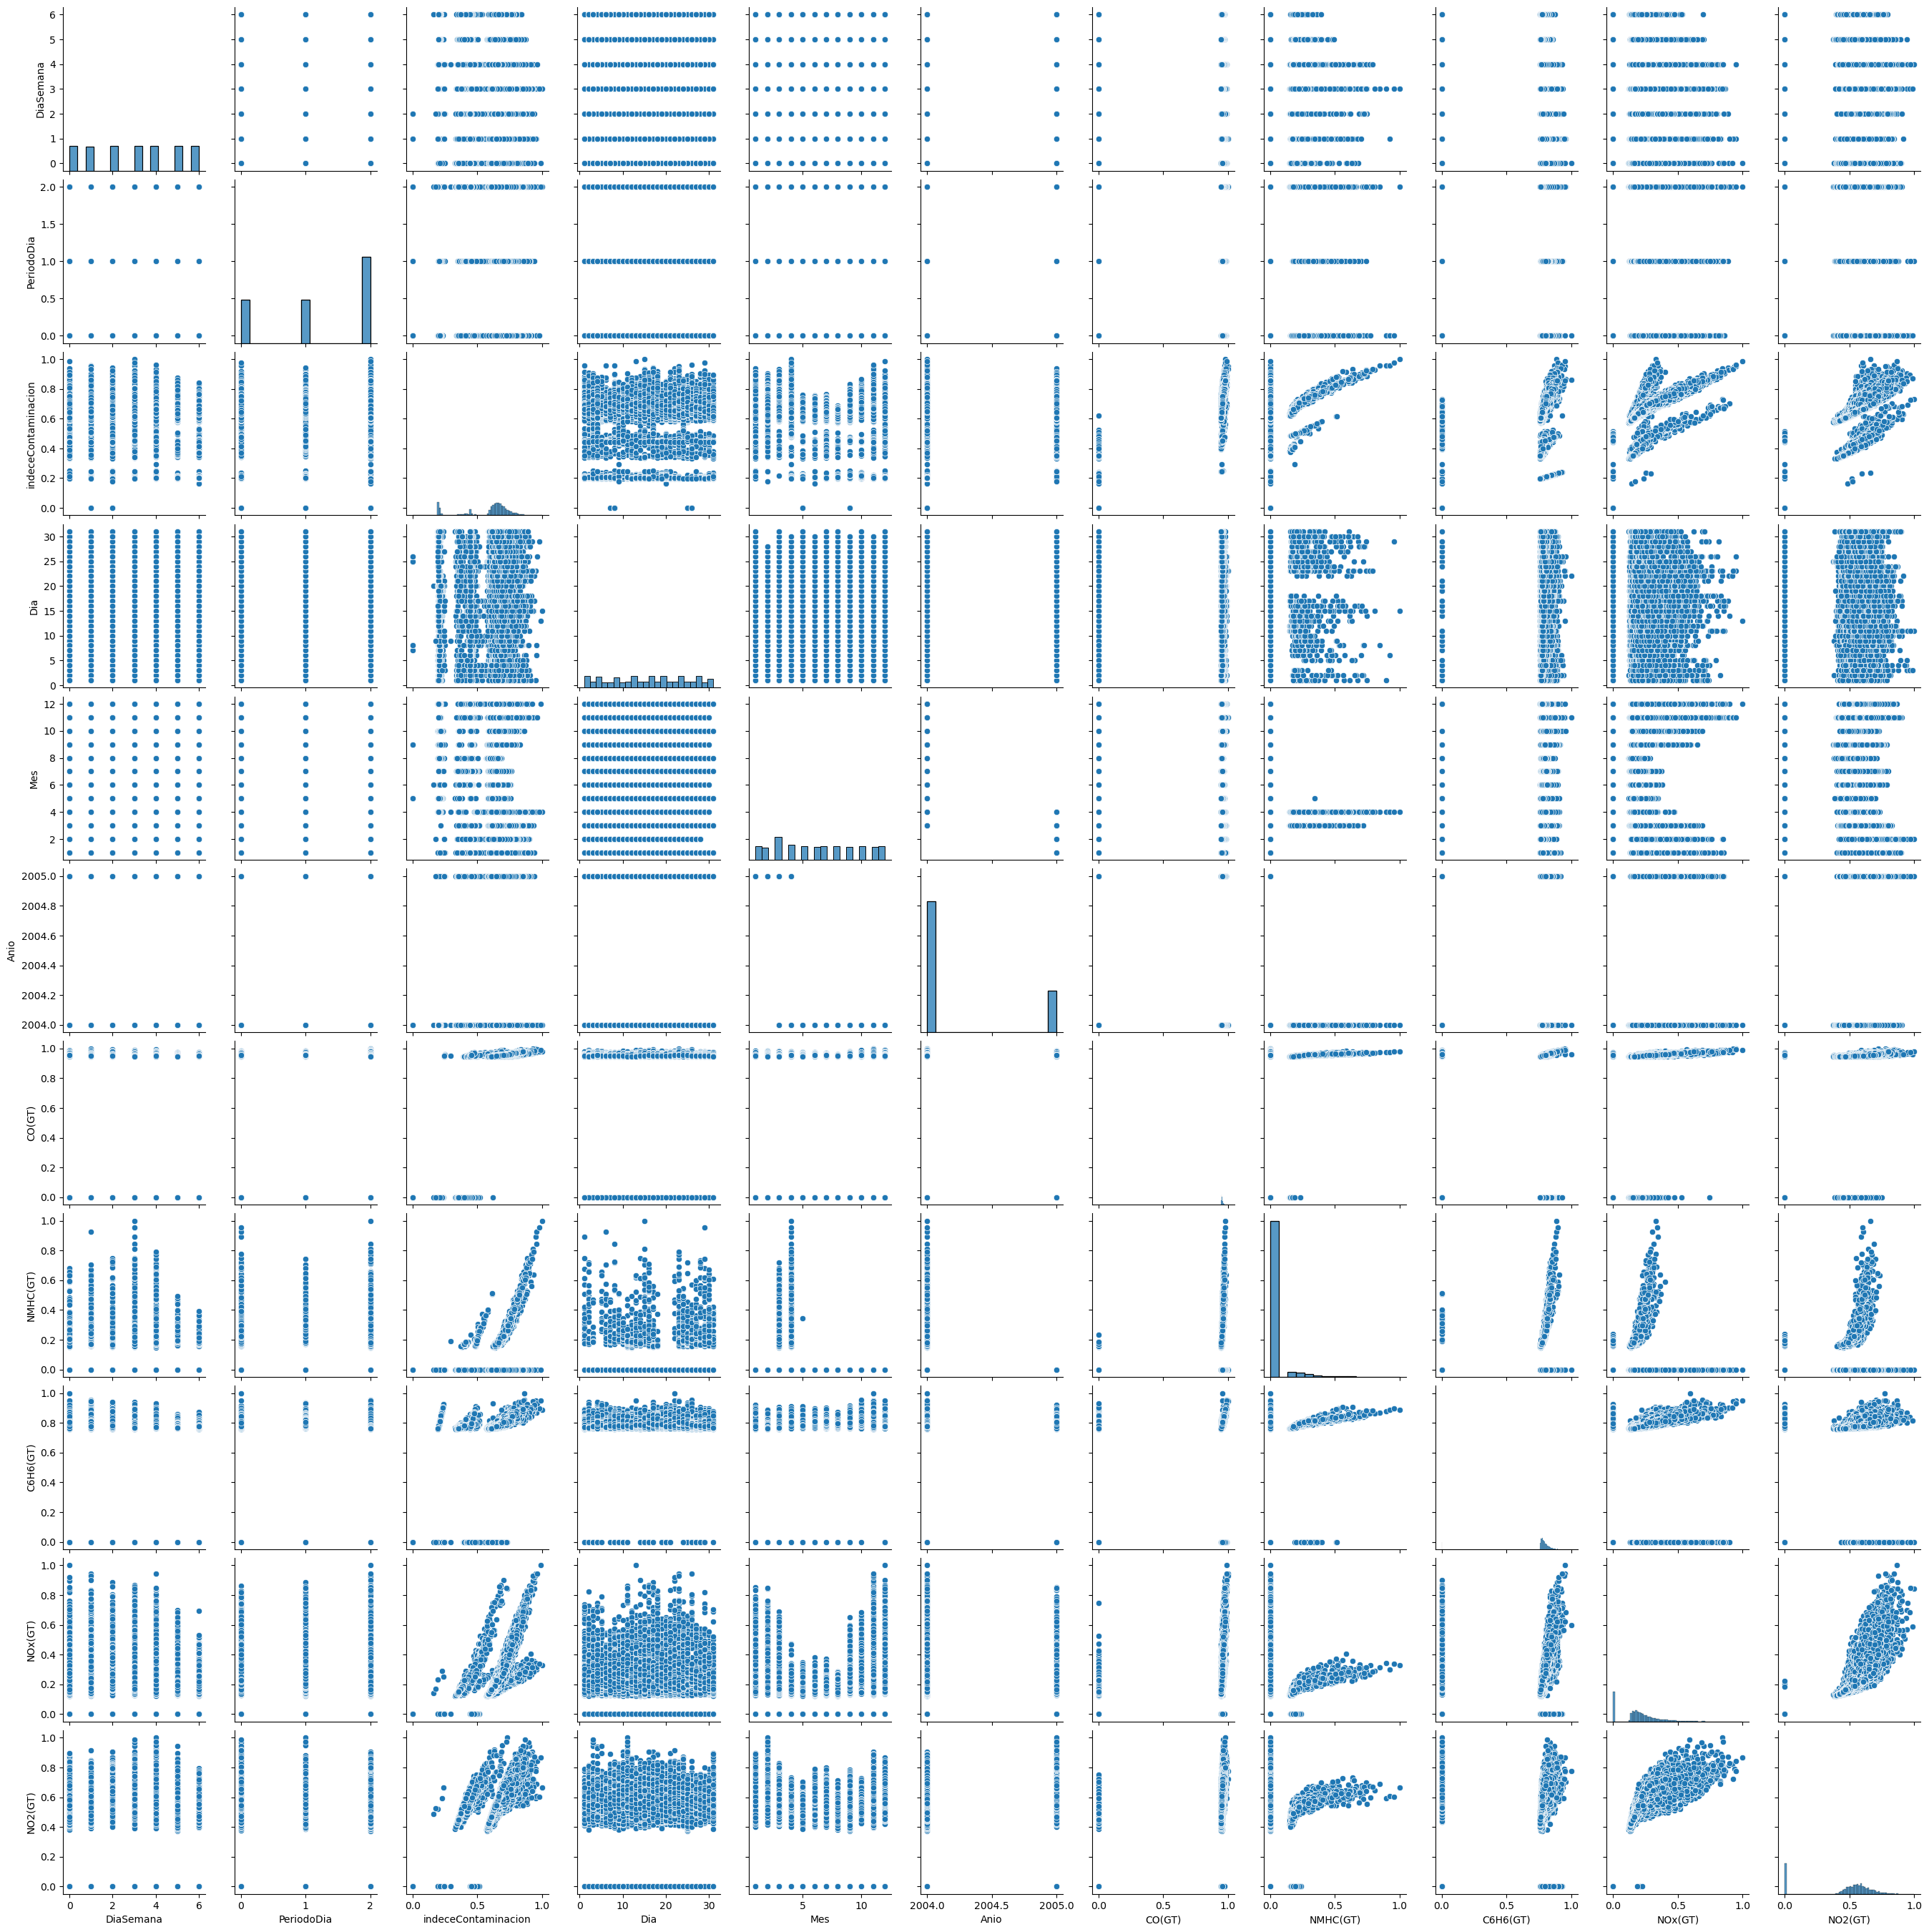

In [ ]:
#  SACAR Pairplot 
import seaborn as sns
import matplotlib.pyplot as plt

# X = df[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH', 'DiaSemana', 'PeriodoDia', 'indeceContaminacion' ]] 
# y = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

X = df[['DiaSemana', 'PeriodoDia', 'indeceContaminacion','Dia', 'Mes', 'Anio' ]] 
y = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]
# Concatenar las variables de gases con las variables transformadas para visualizar todo en el pairplot
X_with_gases = pd.concat([X, y], axis=1)

# Crear el pairplot para comparar las variables de gases con las características
sns.pairplot(X_with_gases)
plt.show()

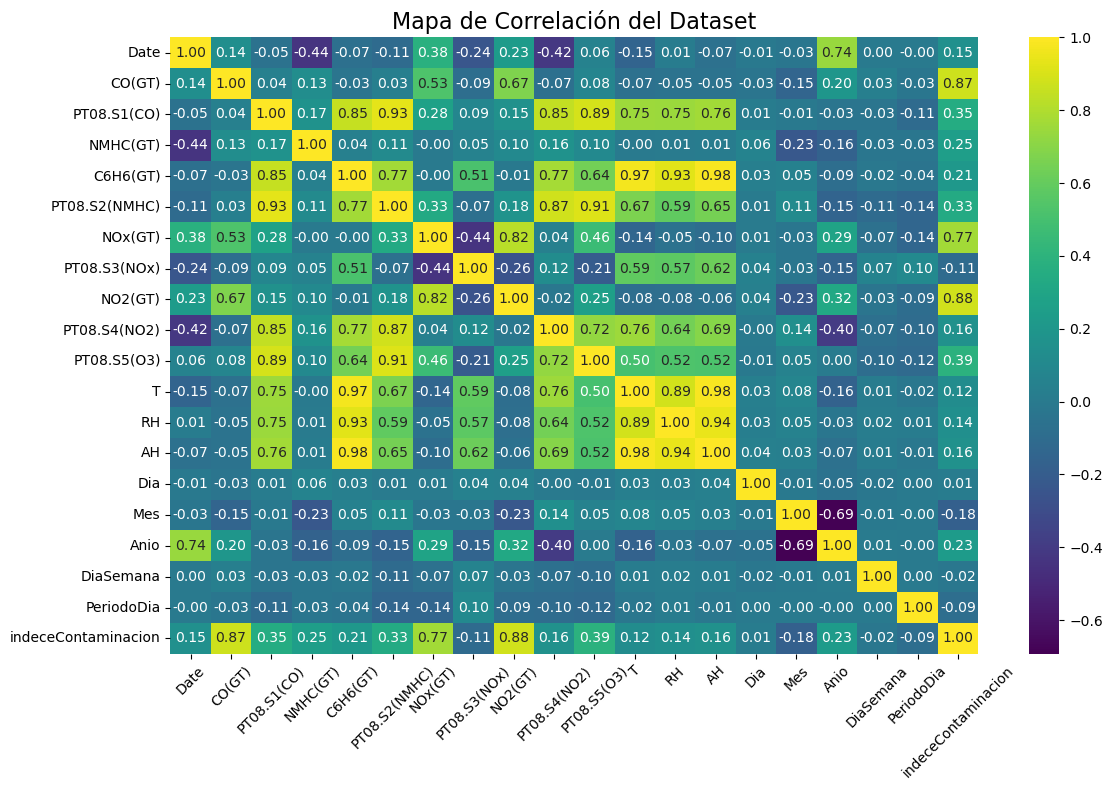

In [26]:
# Seleccionar solo las columnas numéricas
numeric_data = df.select_dtypes(include=['float64', 'int64', 'datetime64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)

# Añadir título y ajustes
plt.title("Mapa de Correlación del Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# CONTAMINATES POR DIA DEL MES Y AÑO MIRANDO EL PERIODO DE LOS DIAS 

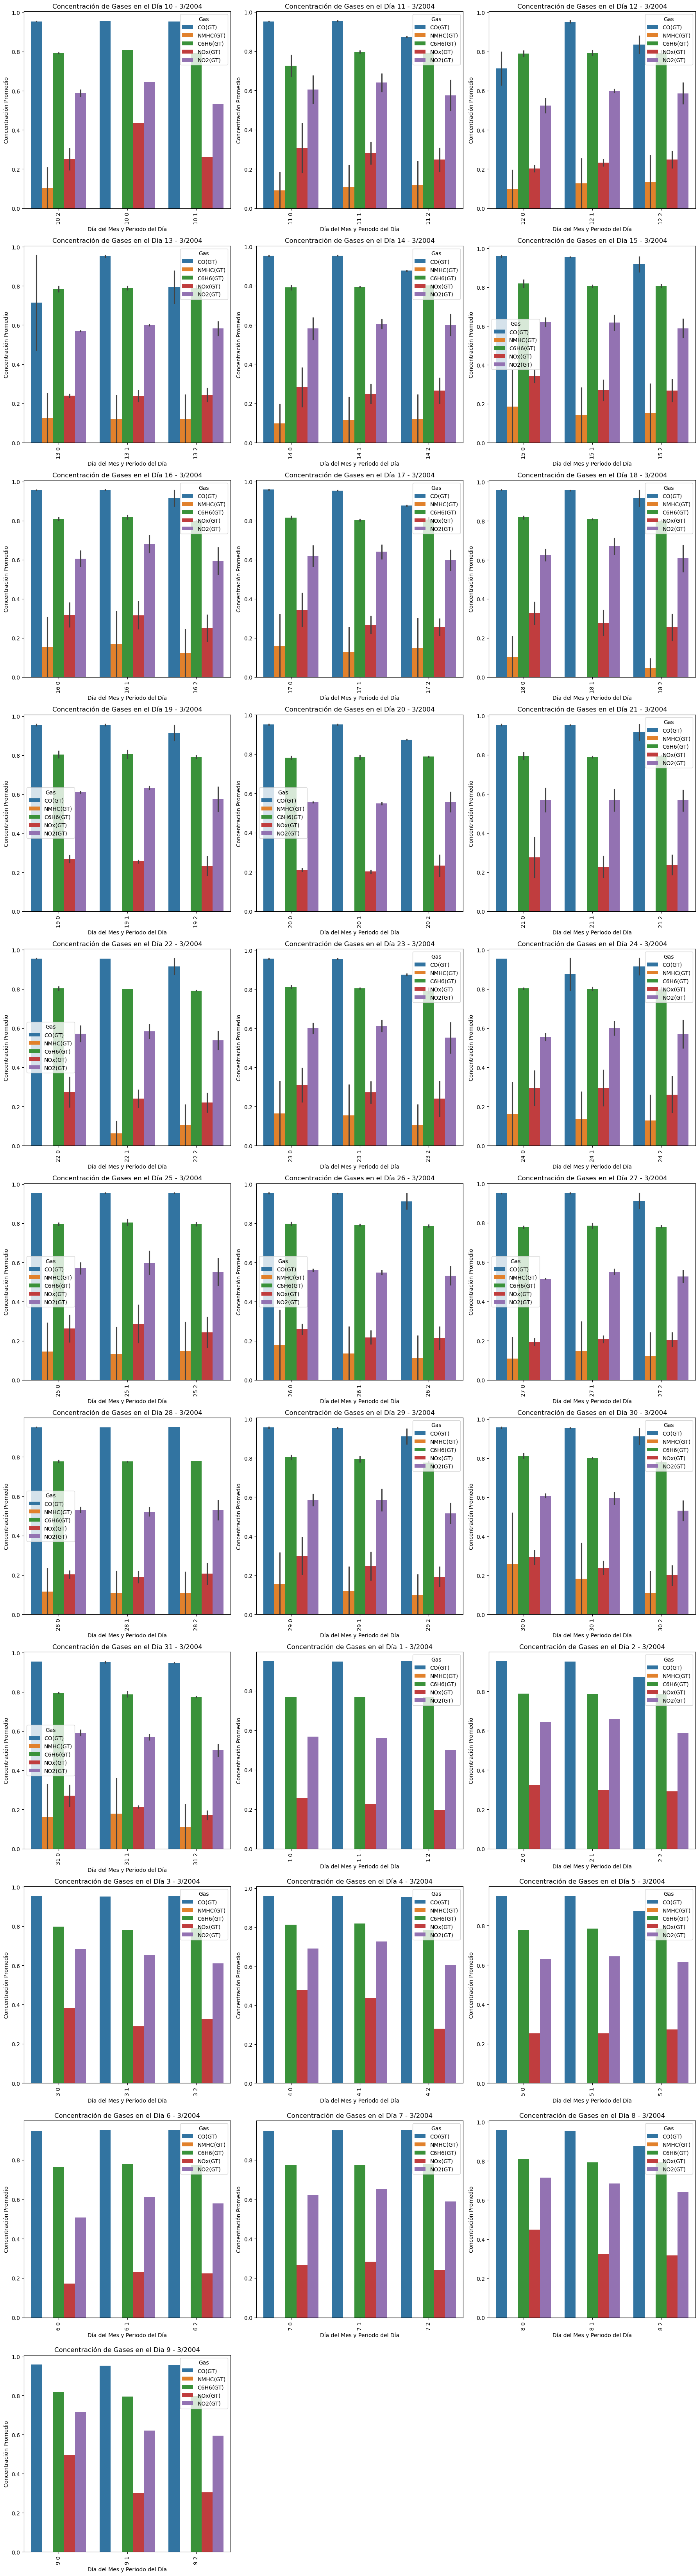

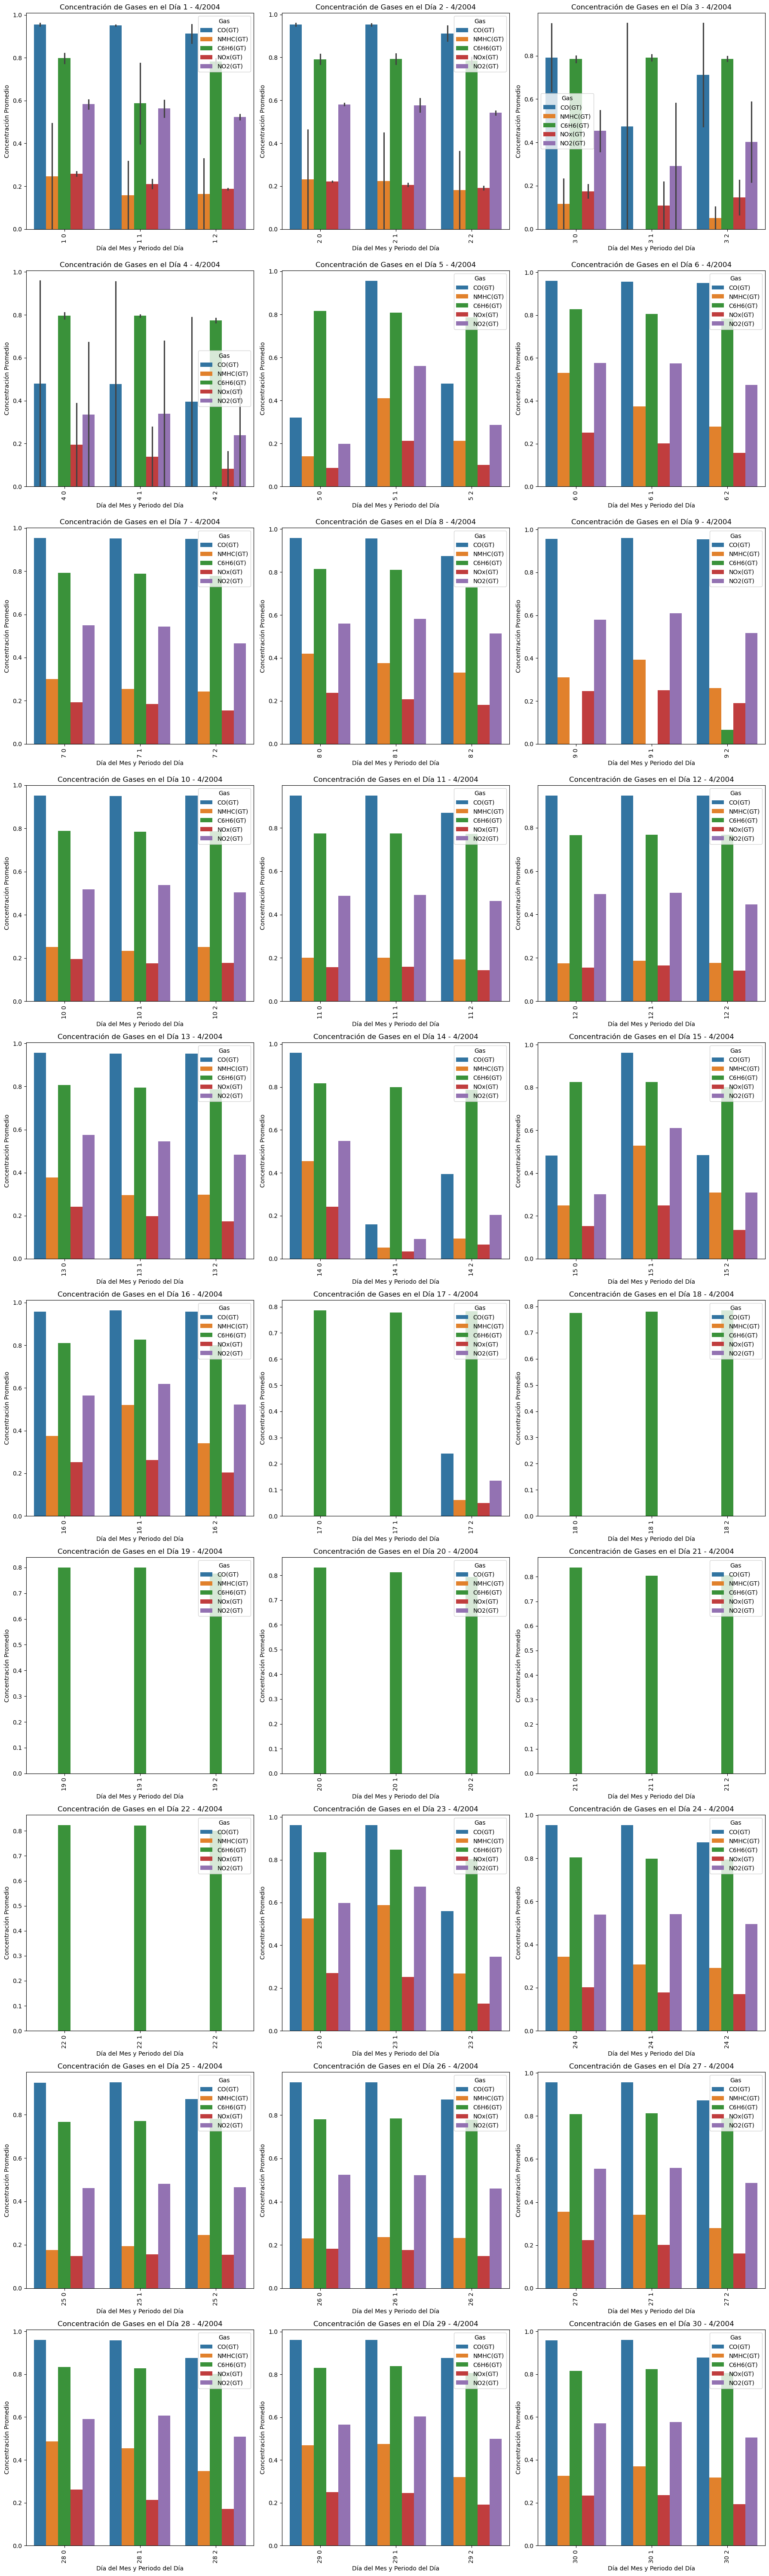

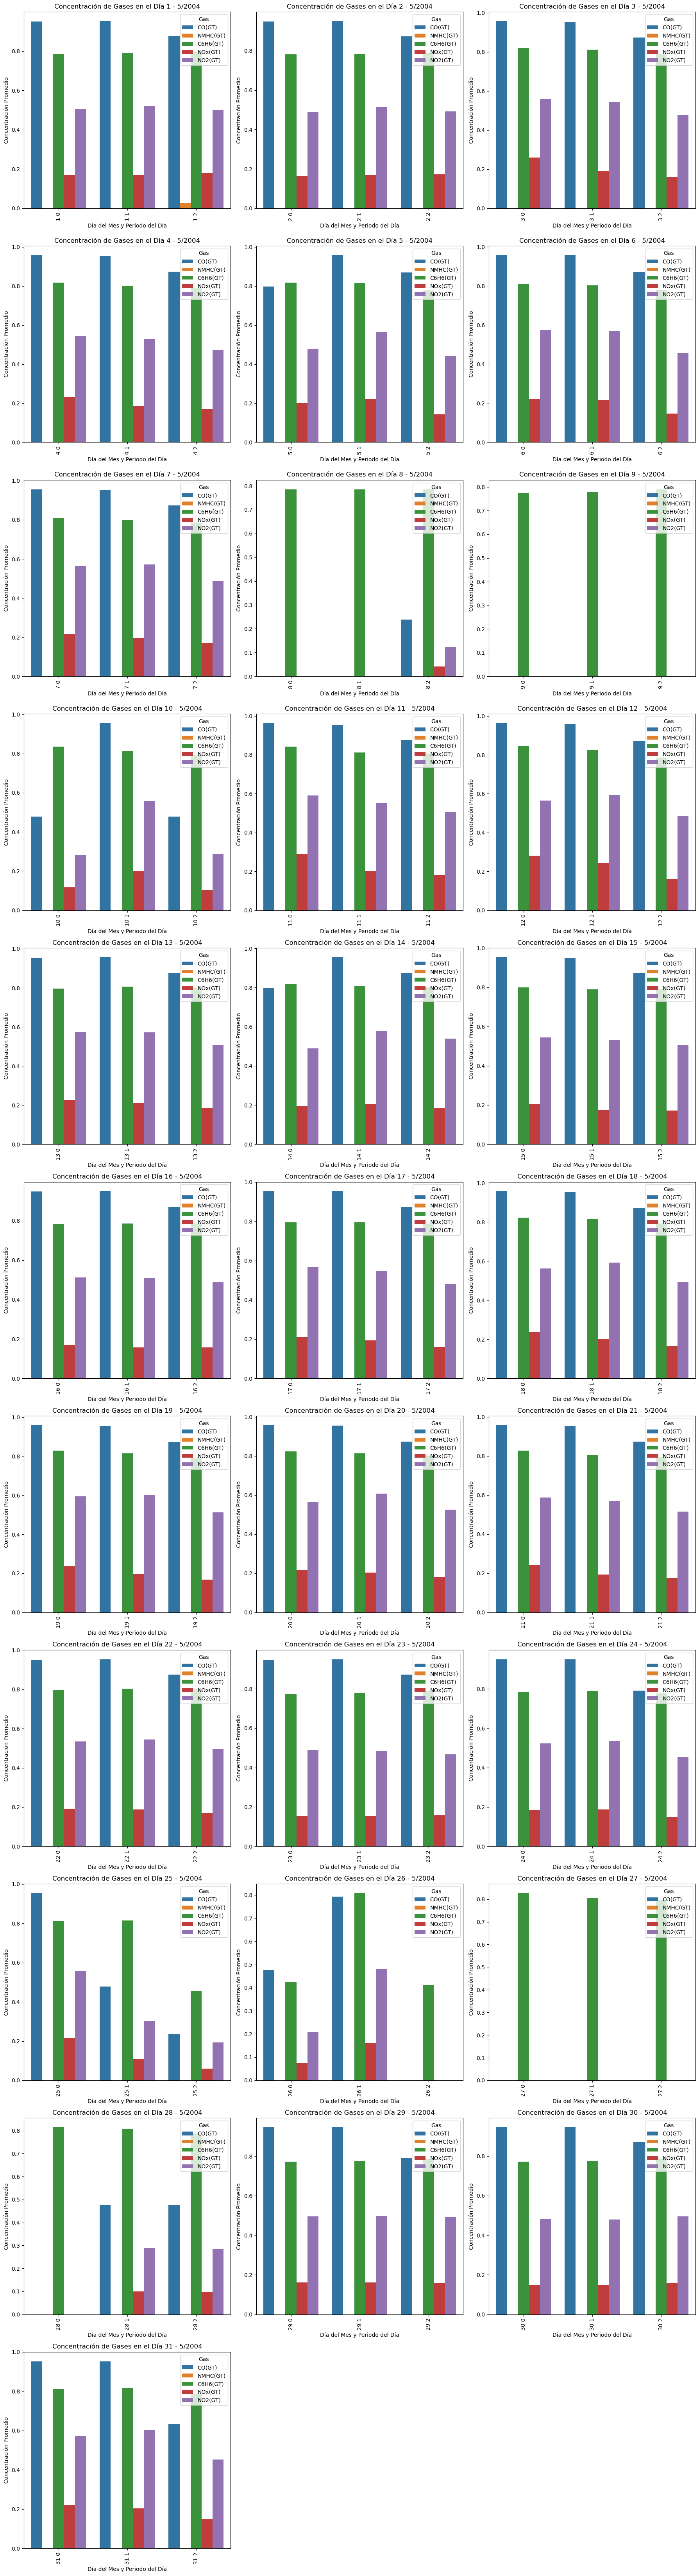

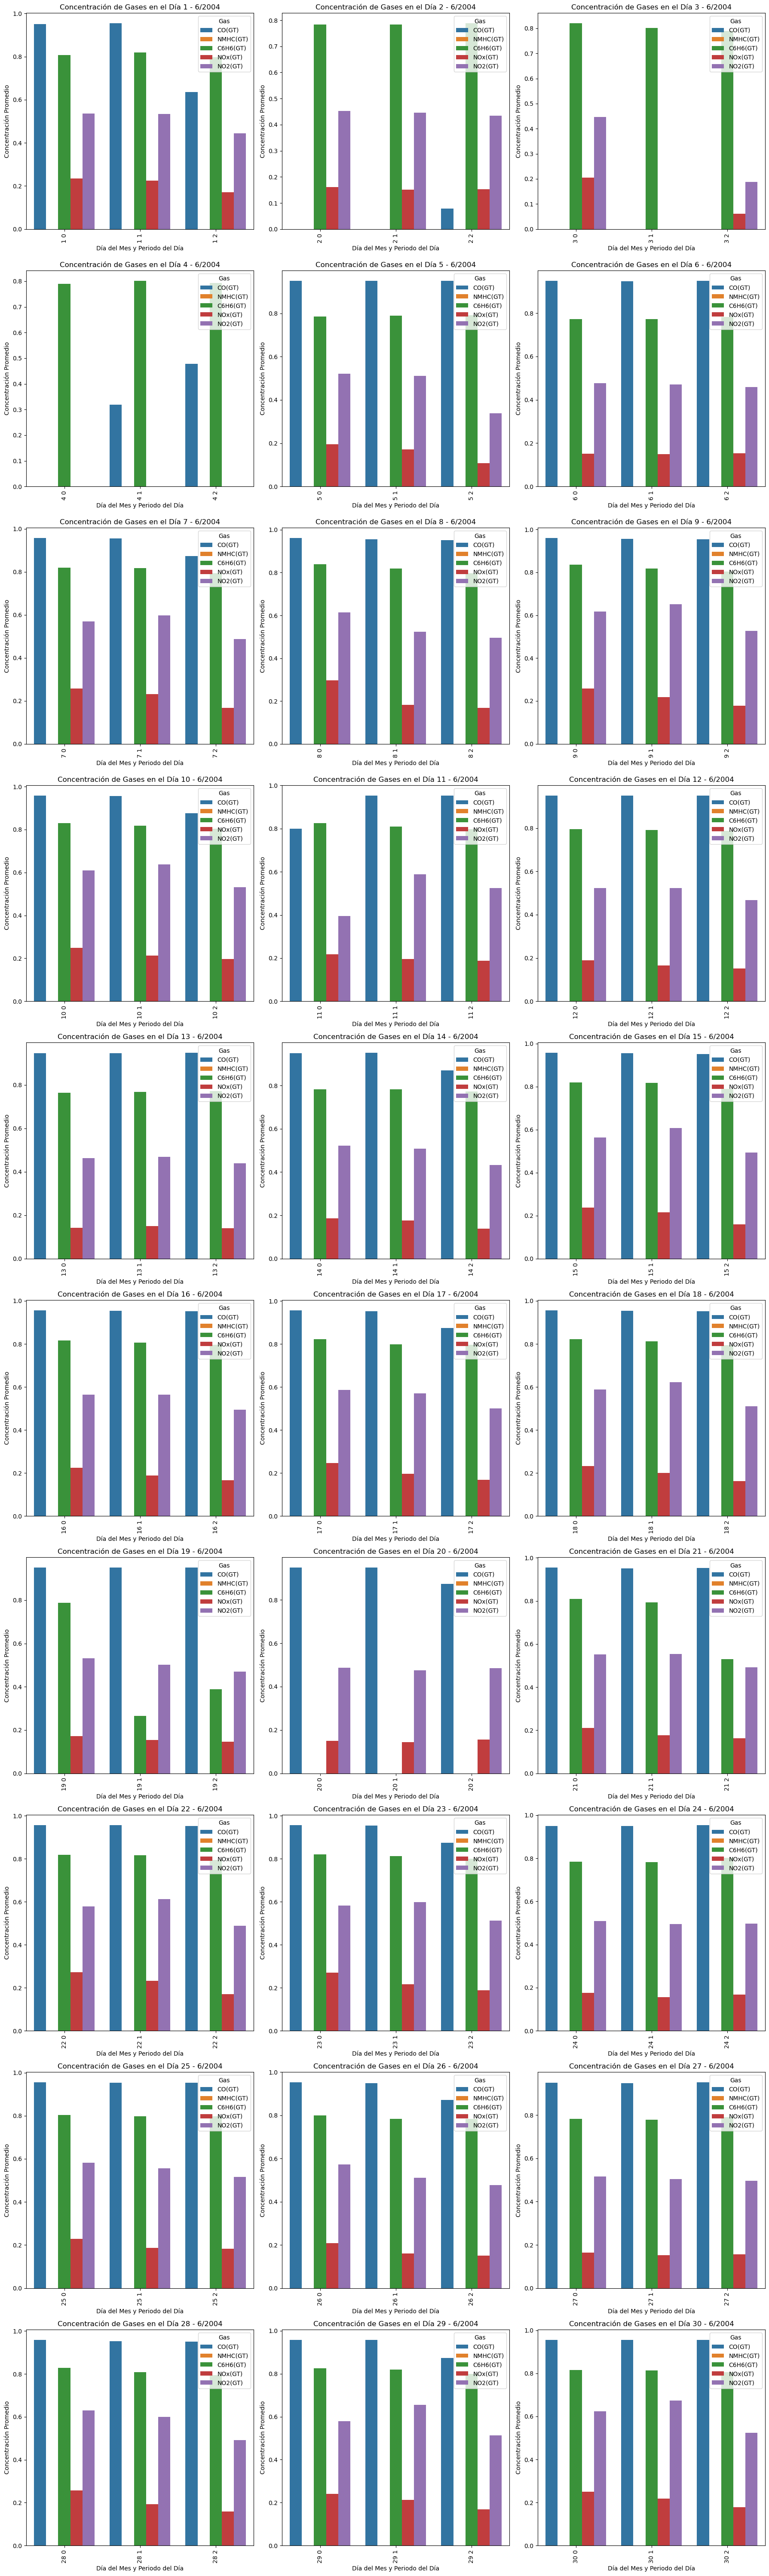

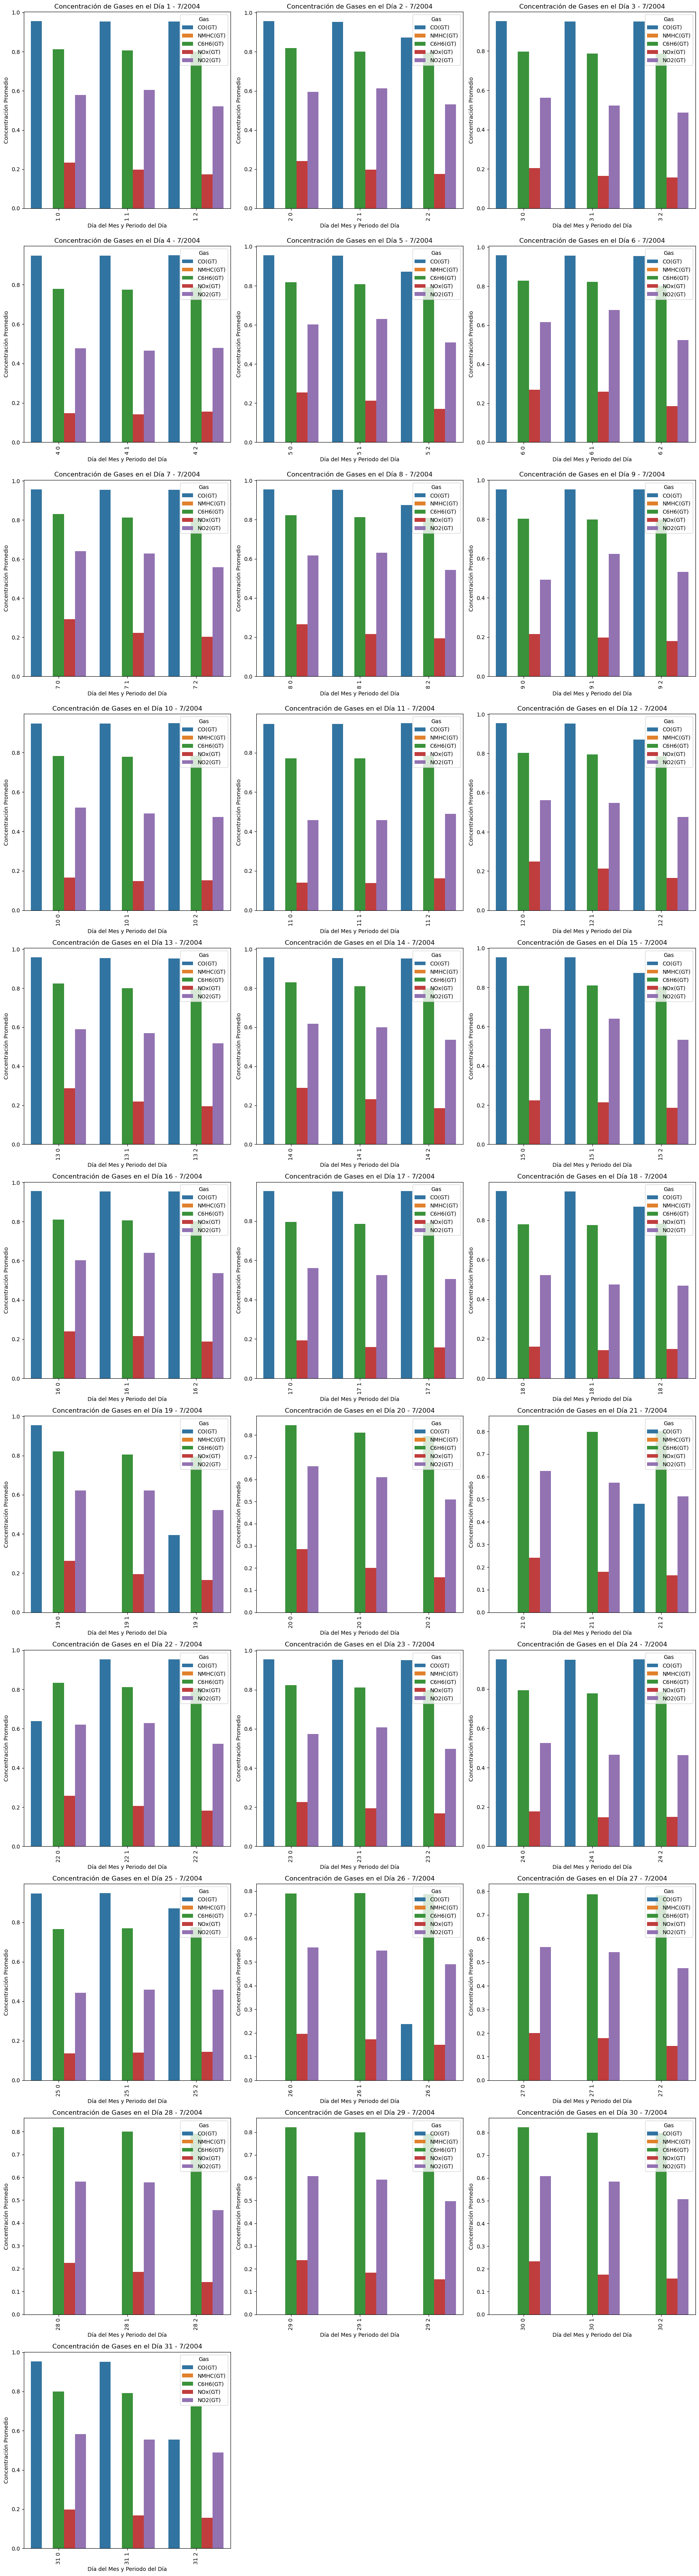

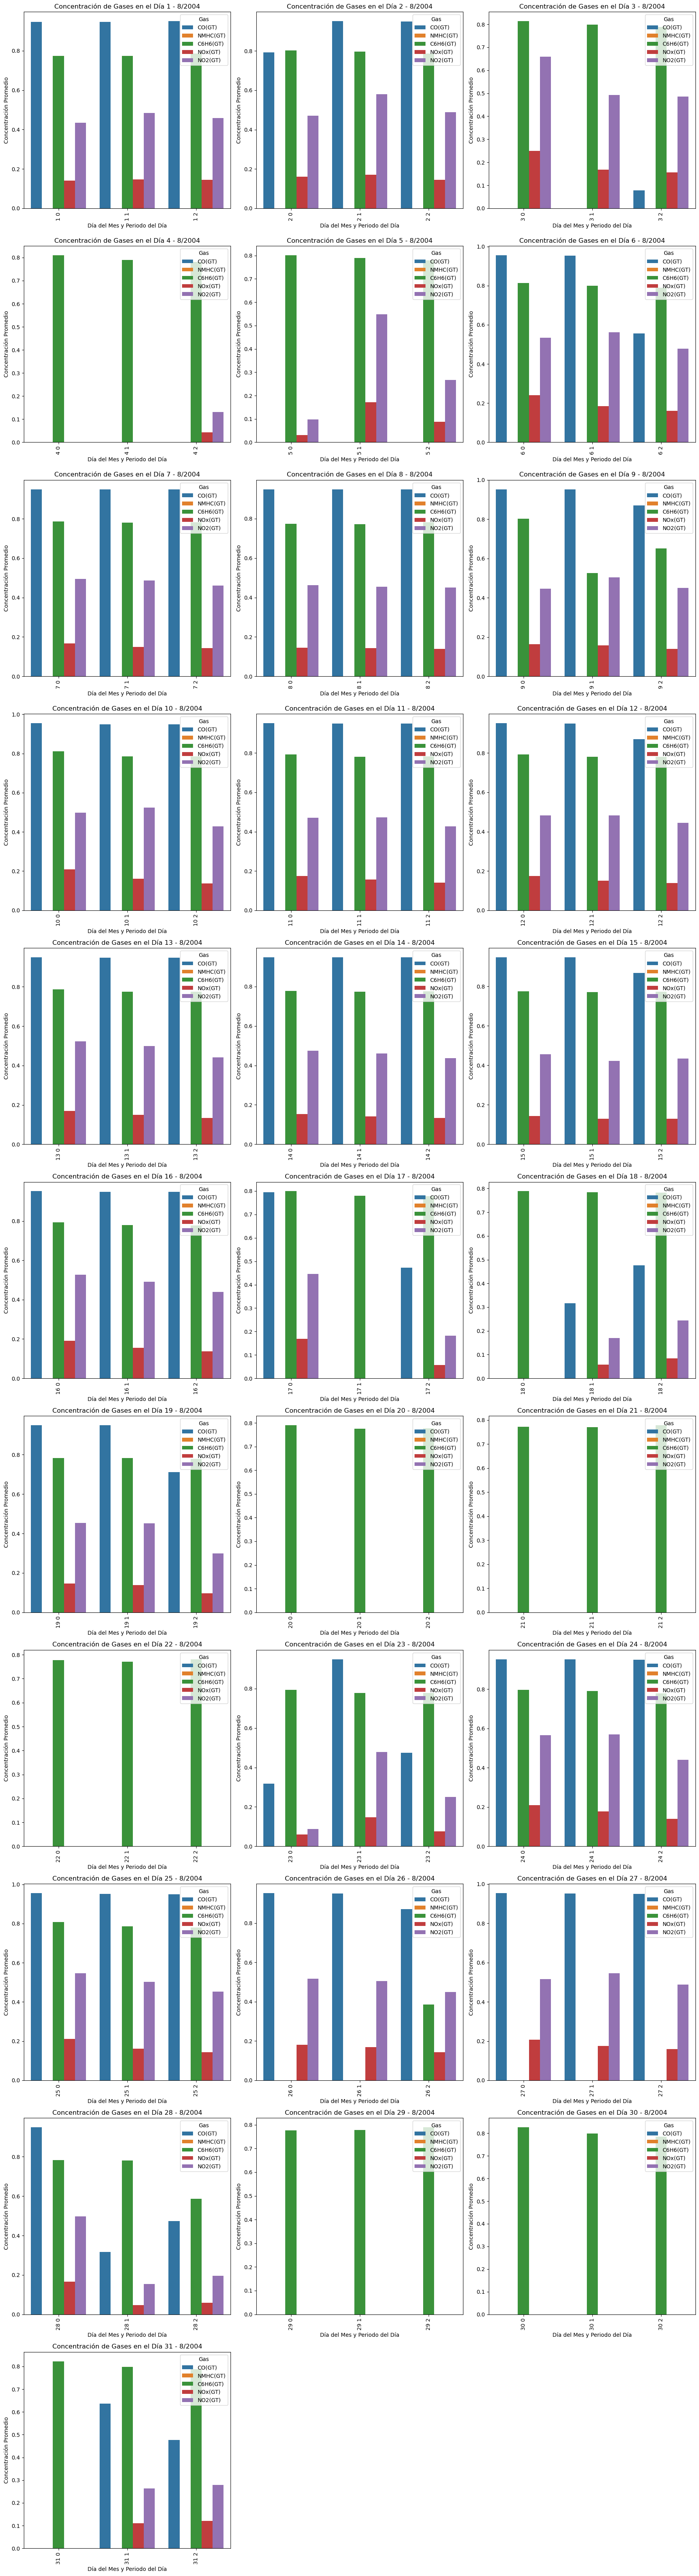

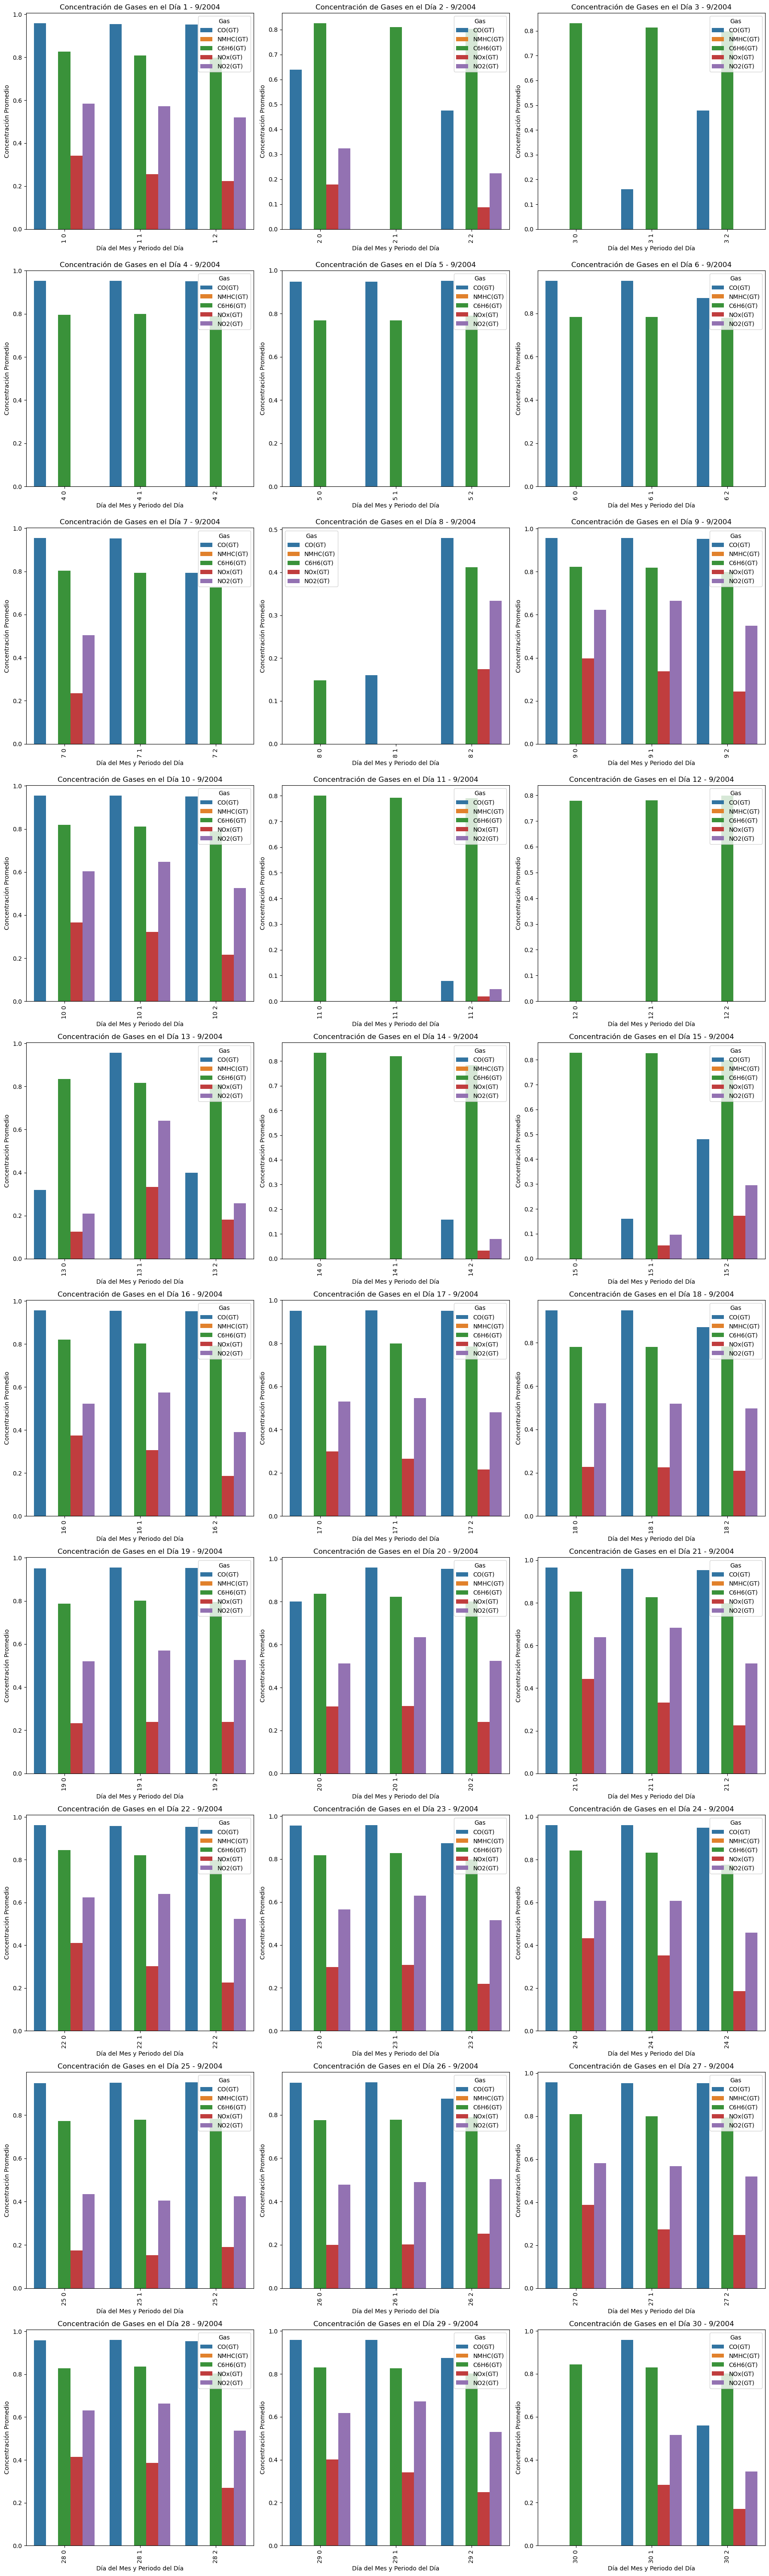

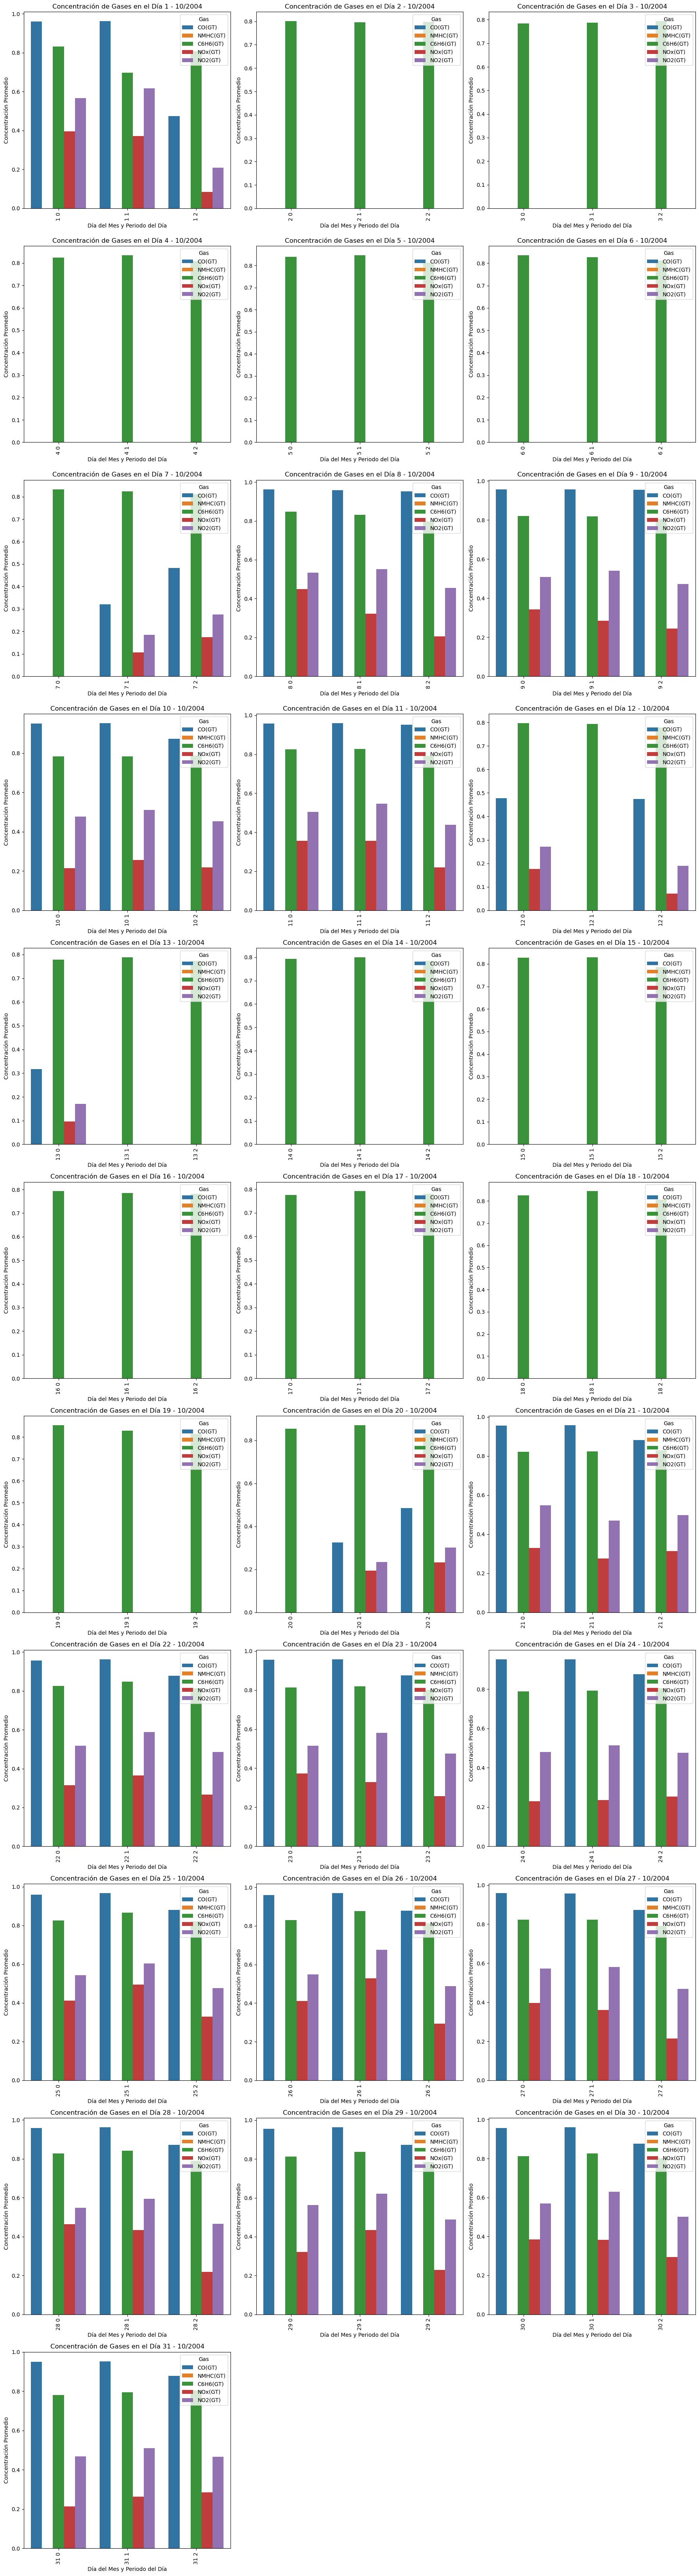

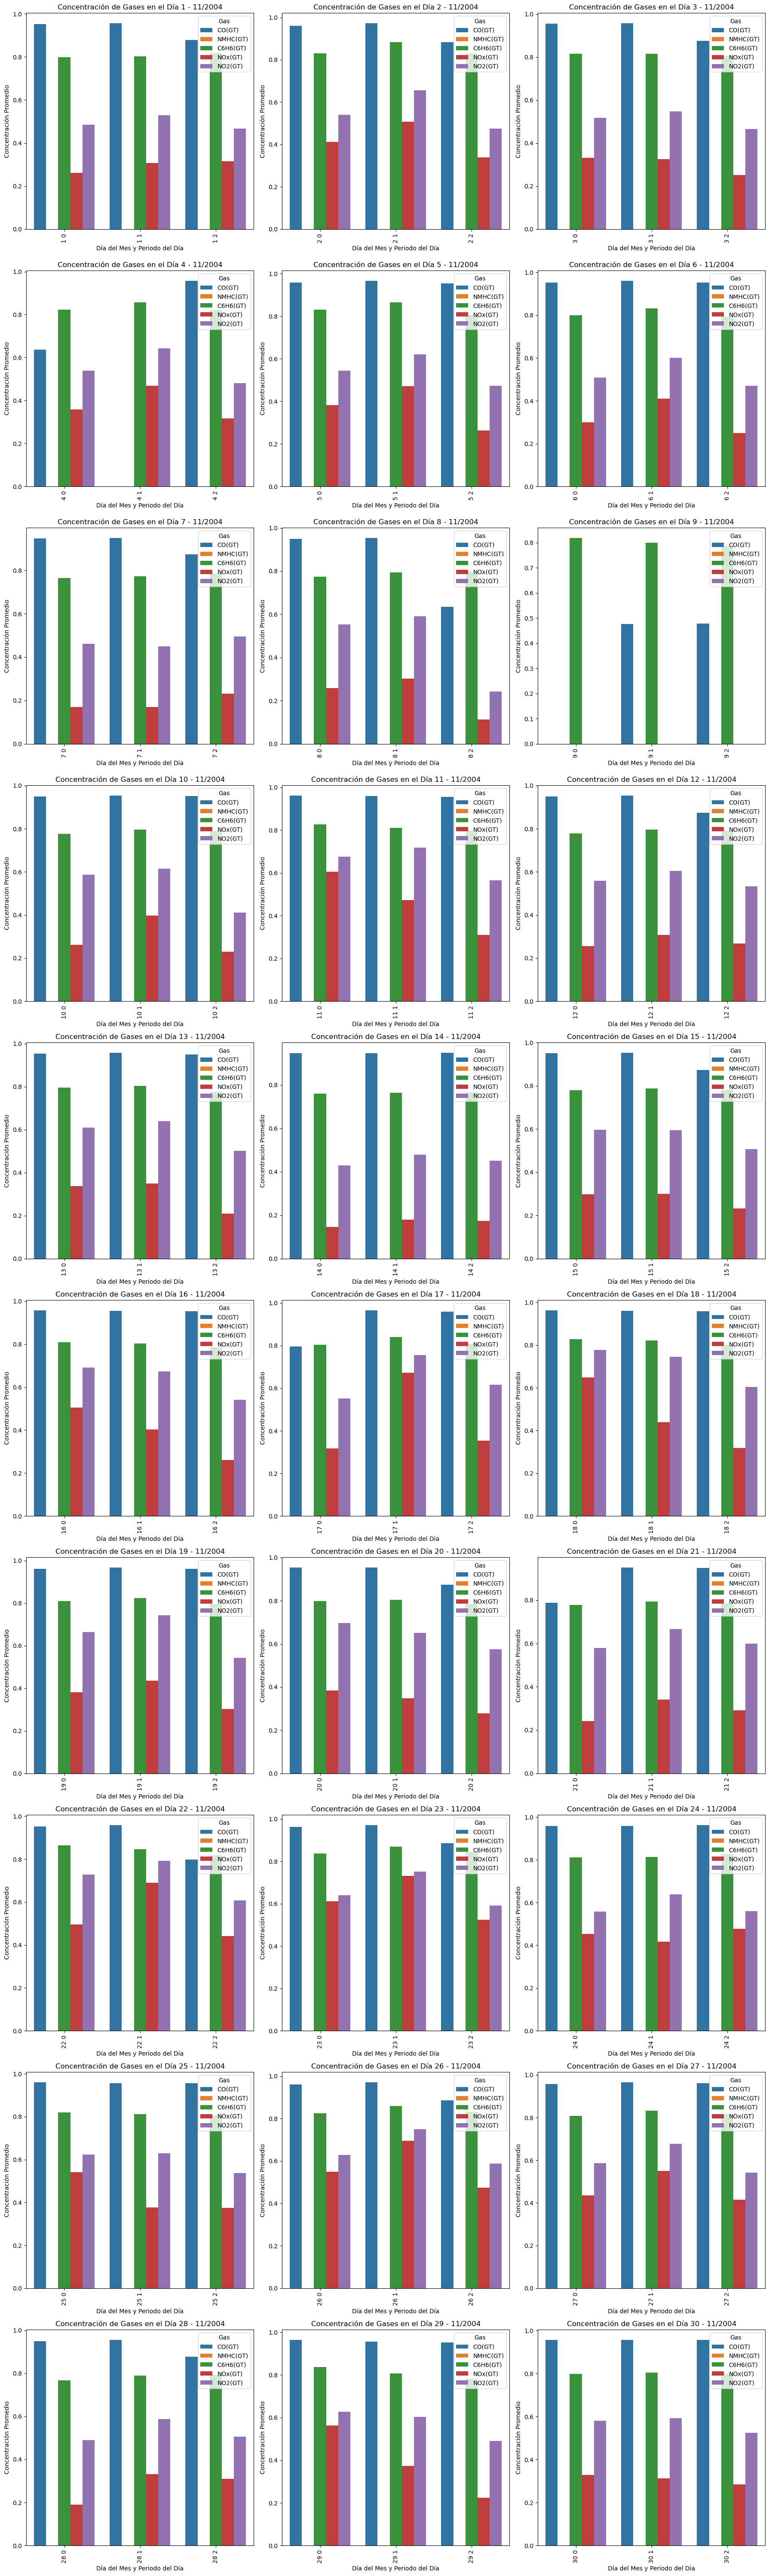

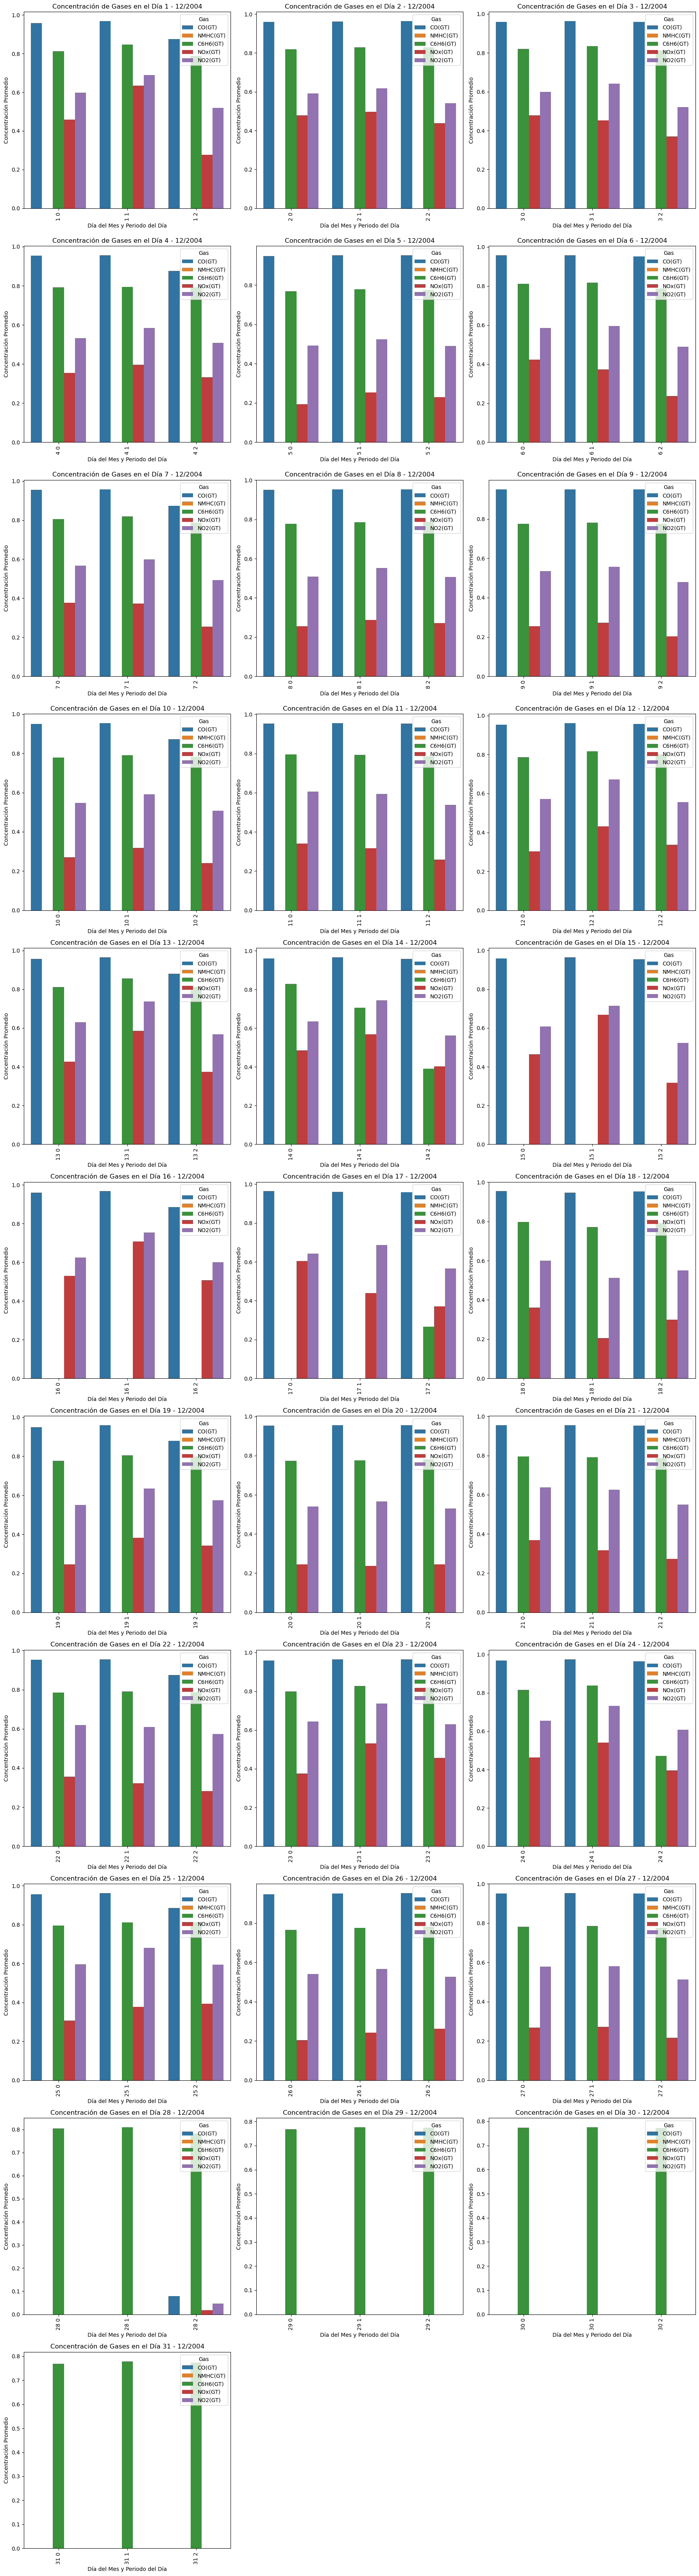

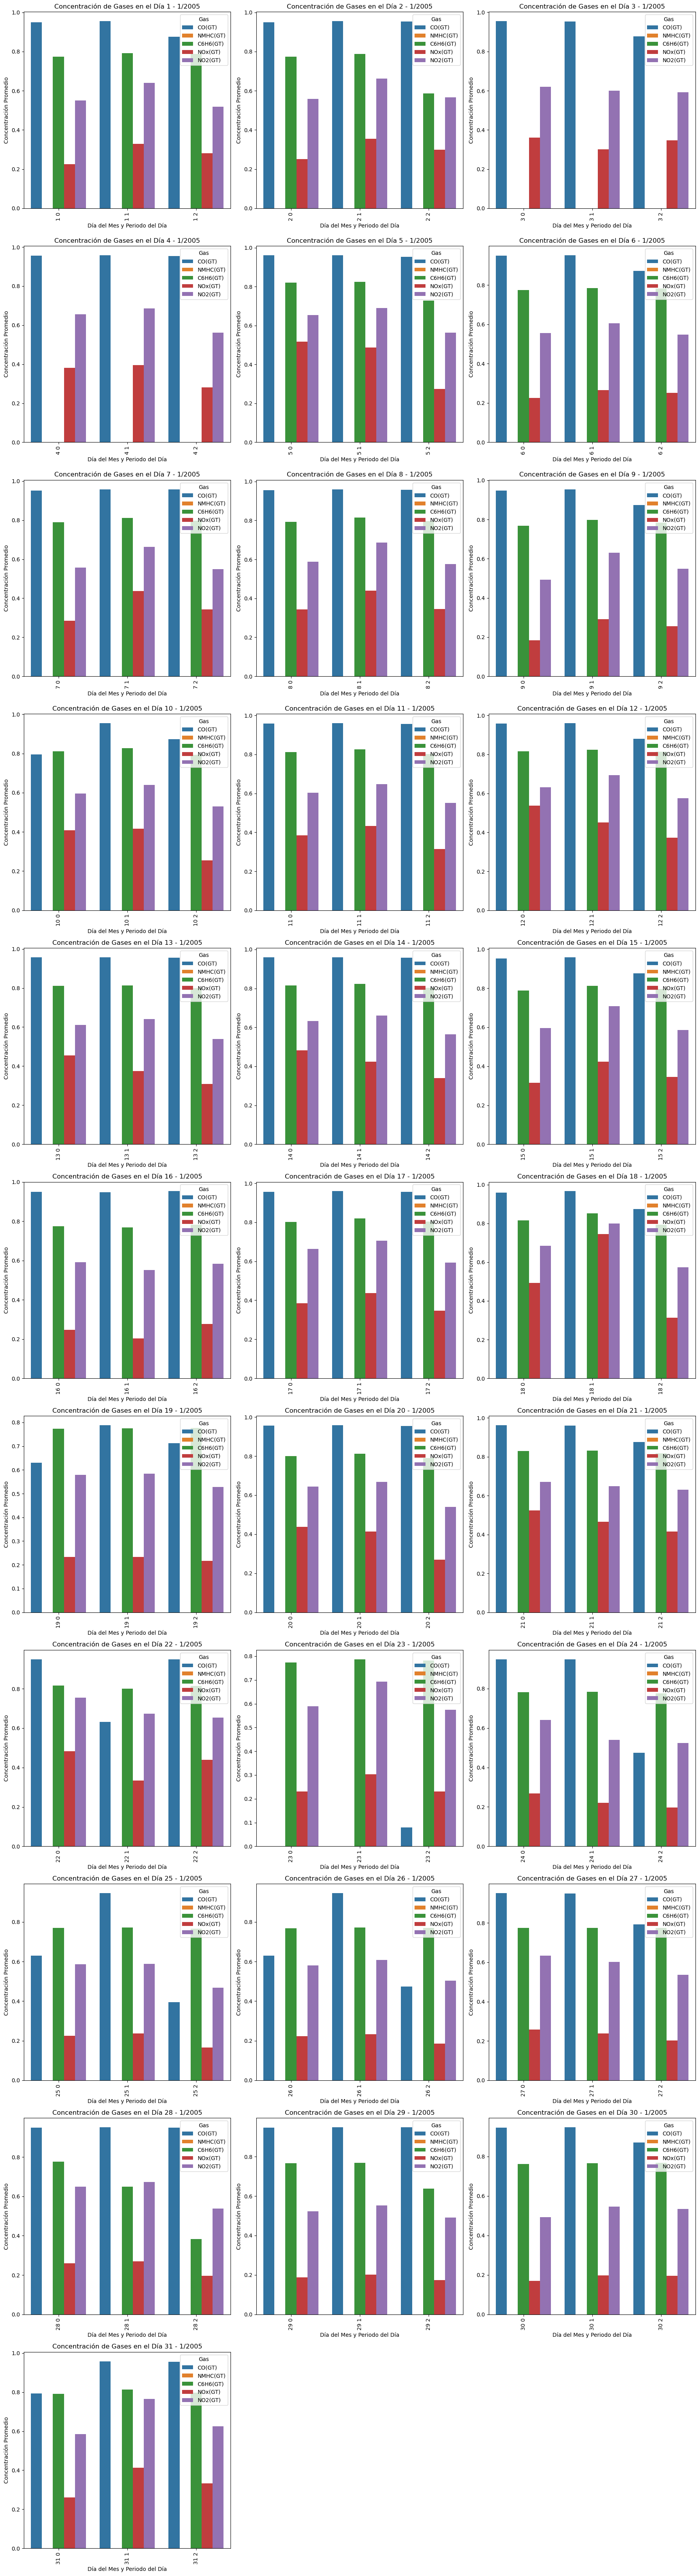

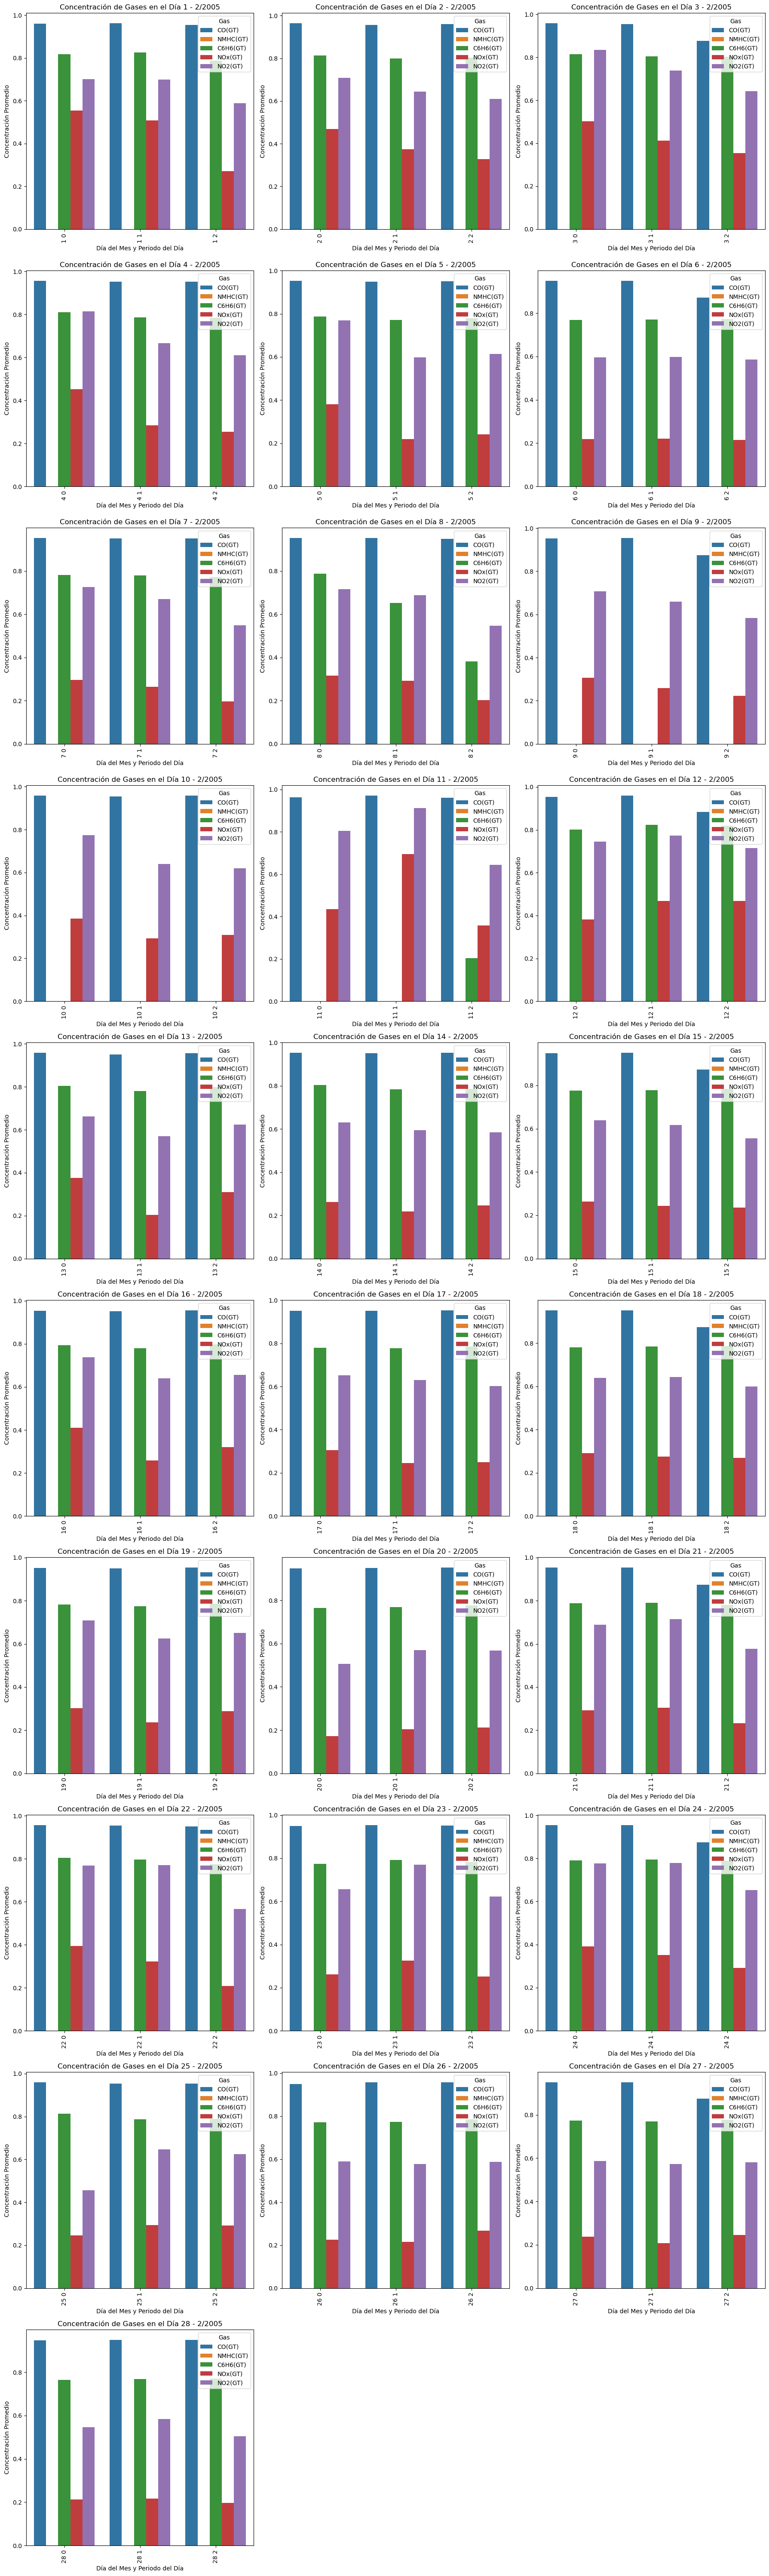

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gases a analizar
gases = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Agrupar los datos por año, mes, día y periodo del día, y calcular el promedio de cada gas
df_grouped = df.groupby(['Anio', 'Mes', 'Dia', 'PeriodoDia'])[gases].mean().reset_index()

# Crear una nueva columna que combine las variables 'Dia' y 'PeriodoDia' para el eje X
df_grouped['Fecha_Periodo'] = df_grouped['Dia'].astype(str) + ' ' + df_grouped['PeriodoDia'].astype(str)

# Generar gráficos para cada mes
for mes in df_grouped['Mes'].unique():
    # Filtrar los datos para el mes actual
    df_month = df_grouped[df_grouped['Mes'] == mes]
    anio = df_month['Anio'].iloc[0]  # Extraer el año para este mes
    
    # Establecer el número de filas y columnas en función del número de días en el mes
    n_dias = len(df_month['Dia'].unique())
    n_filas = (n_dias + 2) // 3  # Aproximadamente 3 gráficos por fila
    n_columnas = 3  # Tres gráficos por fila

    # Crear la figura y los subgráficos para este mes
    fig, axes = plt.subplots(n_filas, n_columnas, figsize=(18, 6 * n_filas))

    # Aplanar el arreglo de ejes para facilitar la iteración
    axes = axes.flatten()

    # Graficar cada día del mes con el periodo del día en un subgráfico
    for idx, dia in enumerate(df_month['Dia'].unique()):
        # Filtrar los datos para el día actual
        df_day = df_month[df_month['Dia'] == dia]
        
        # Graficar todos los gases
        sns.barplot(
            data=df_day.melt(id_vars=['Fecha_Periodo'], value_vars=gases, var_name='Gas', value_name='Concentración'),
            x='Fecha_Periodo', y='Concentración', hue='Gas', palette='tab10', ax=axes[idx]
        )
        
        # Ajustar el gráfico
        axes[idx].set_title(f'Concentración de Gases en el Día {dia} - {mes}/{anio}')
        axes[idx].set_xlabel('Día del Mes y Periodo del Día')
        axes[idx].set_ylabel('Concentración Promedio')
        axes[idx].tick_params(axis='x', rotation=90)
        axes[idx].legend(title='Gas')

    # Eliminar los subgráficos vacíos si hay menos de 3*filas gráficos
    for i in range(len(df_month['Dia'].unique()), len(axes)):
        fig.delaxes(axes[i])

    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler  # Asegúrate de importar MinMaxScaler
import pandas as pd

# Preprocesamiento: Normalización

# Variables predictoras (X) y objetivo (y)
X = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
y = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

# Crear el transformador para normalizar las características numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X),  # Aplicar MinMaxScaler a las columnas numéricas
    ]
)

# Transformar los datos
X_transformed = preprocessor.fit_transform(X)

# Confirmar la forma de los datos después del preprocesamiento
print(f"Forma después del preprocesamiento: {X_transformed.shape}")



ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

# CONTAMINATES POR DIA DEL MES Y AÑO MIRANDO EL DIA DE LA SEMANA  

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


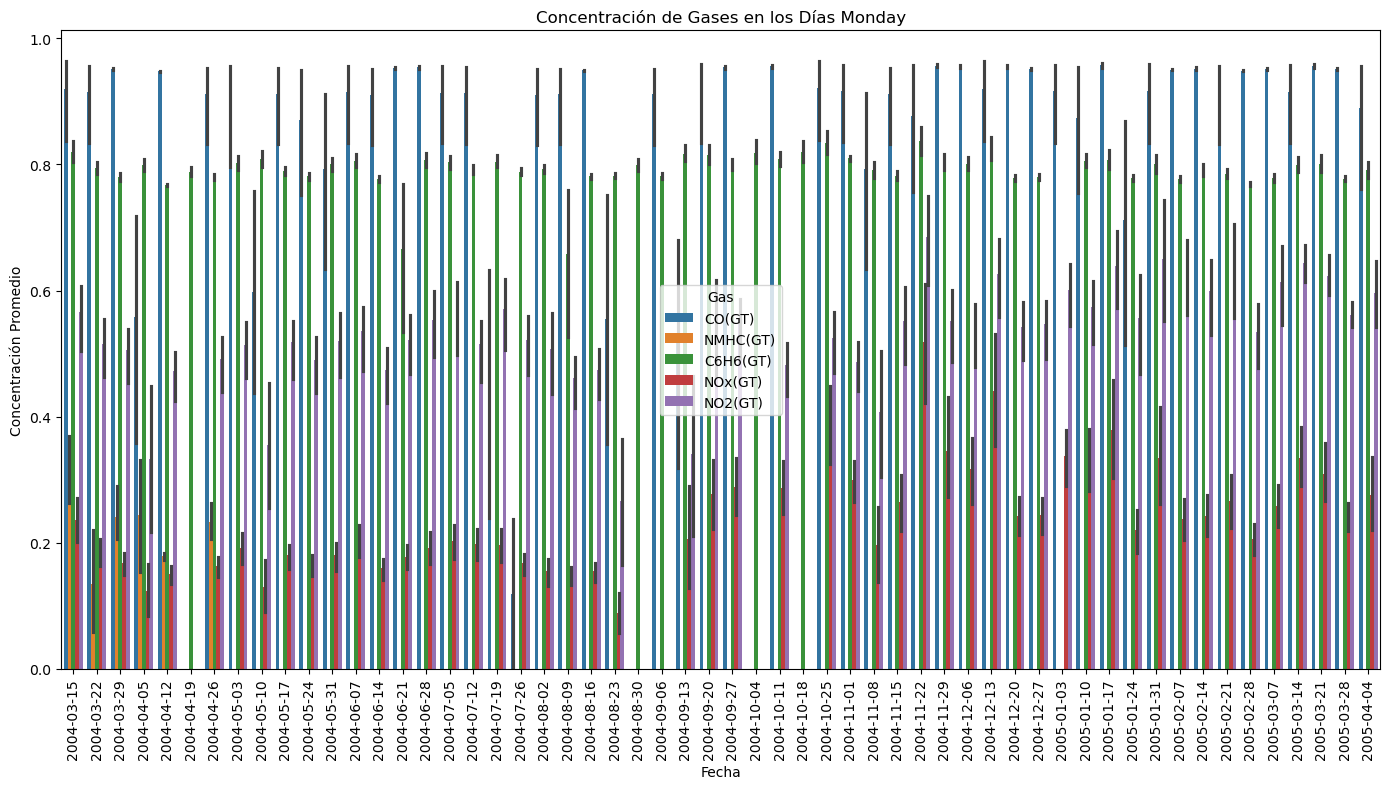

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


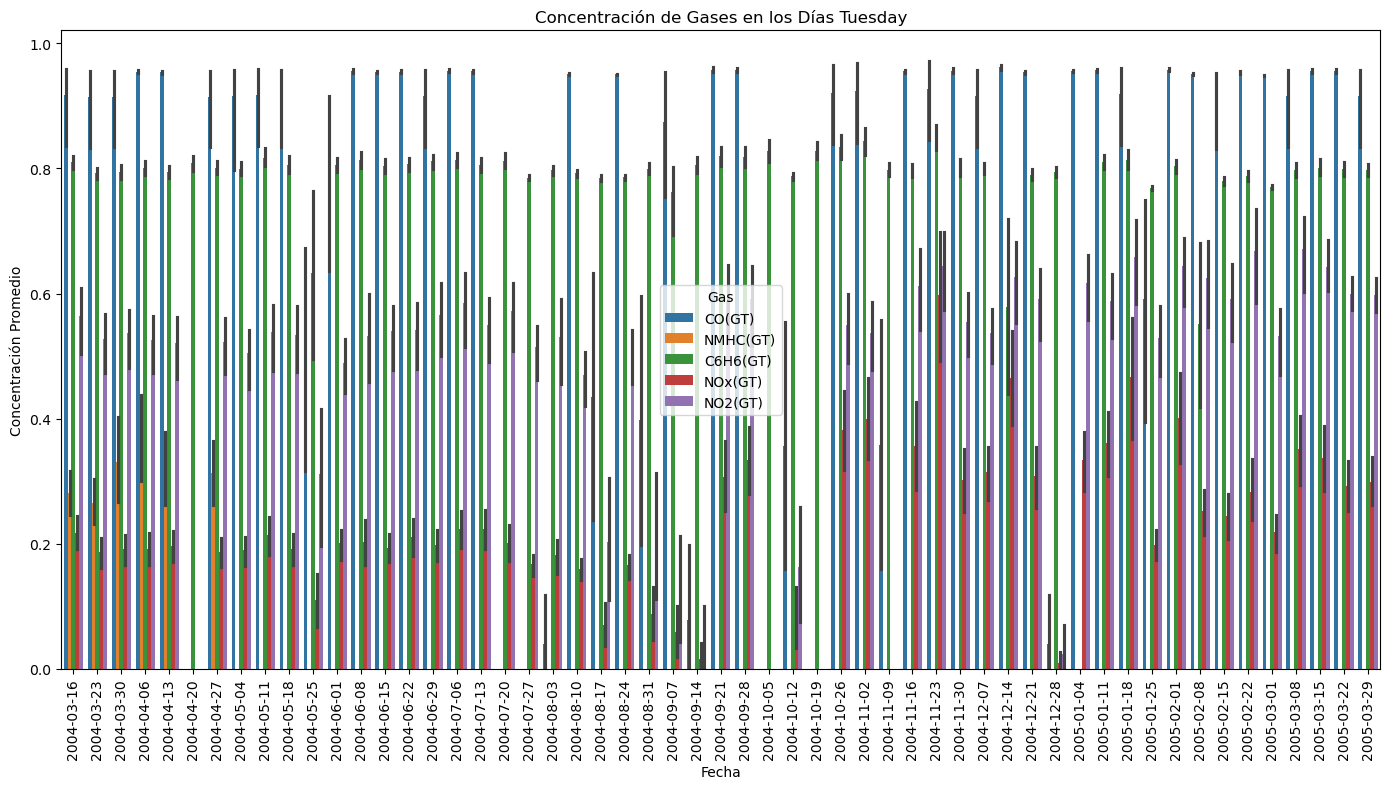

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


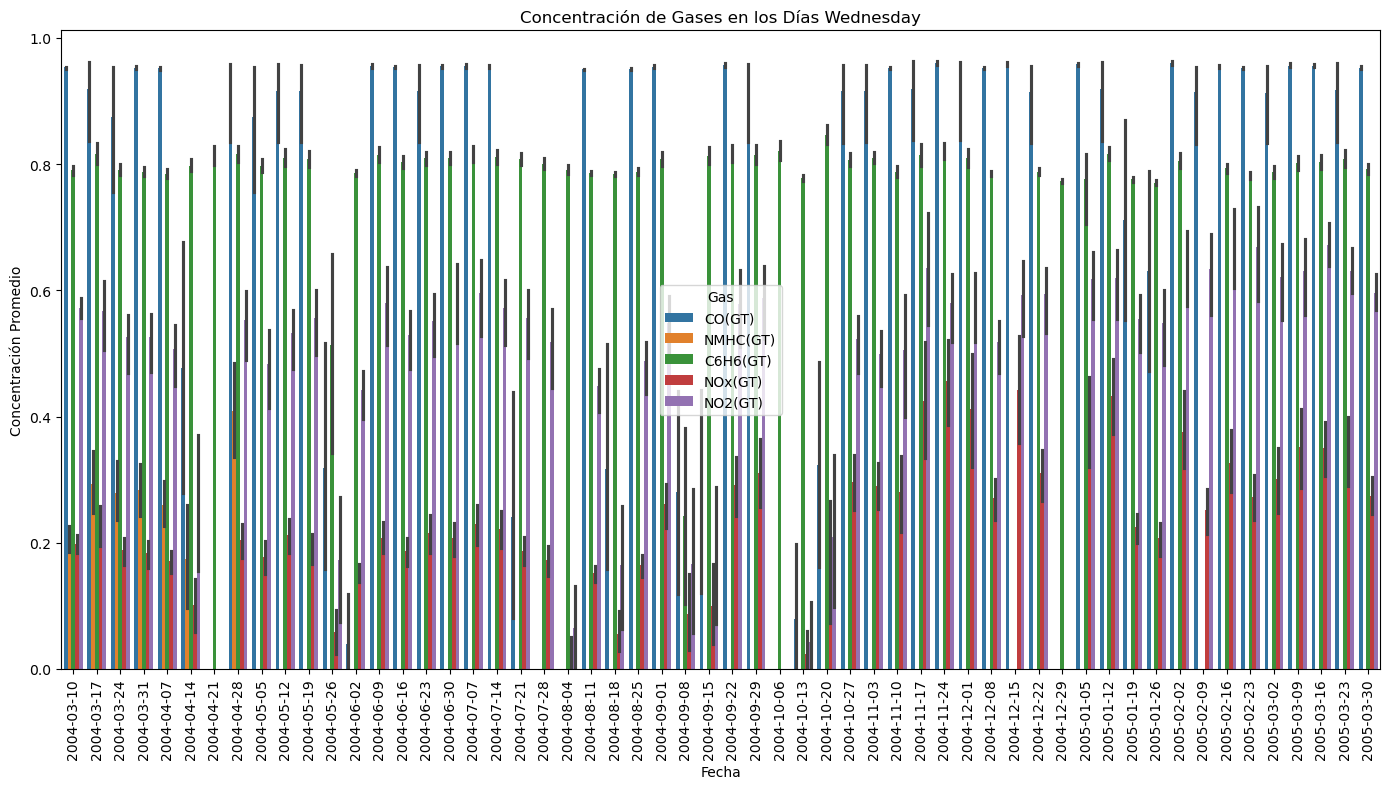

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


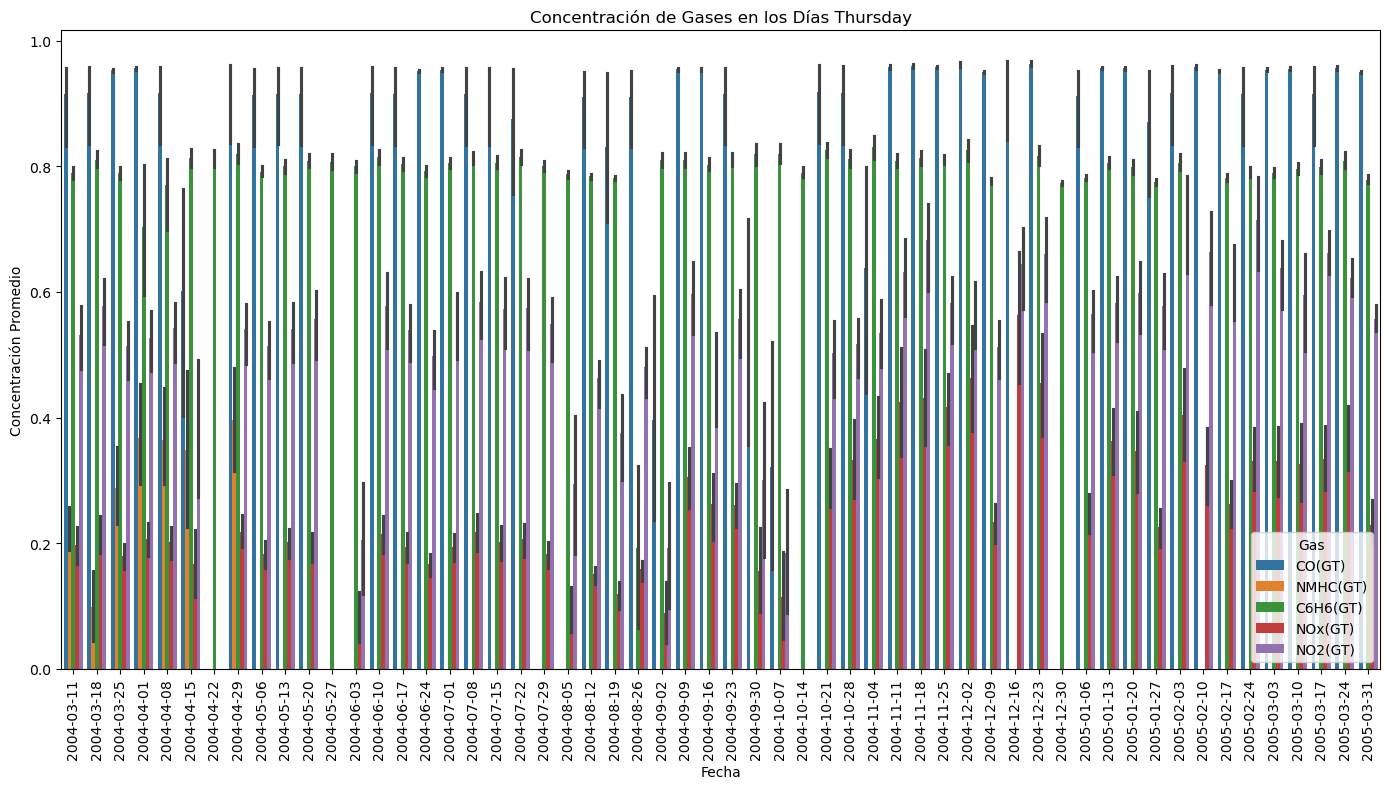

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


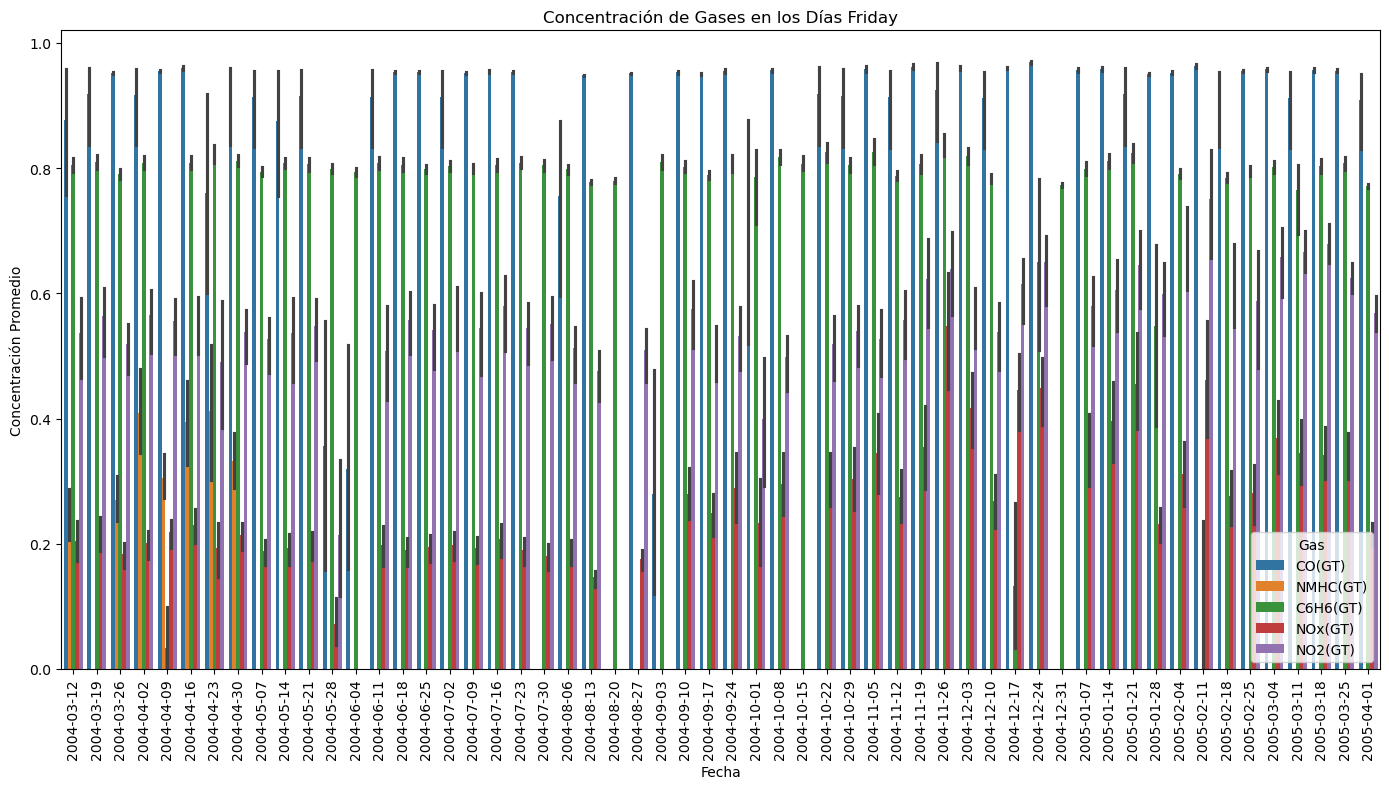

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


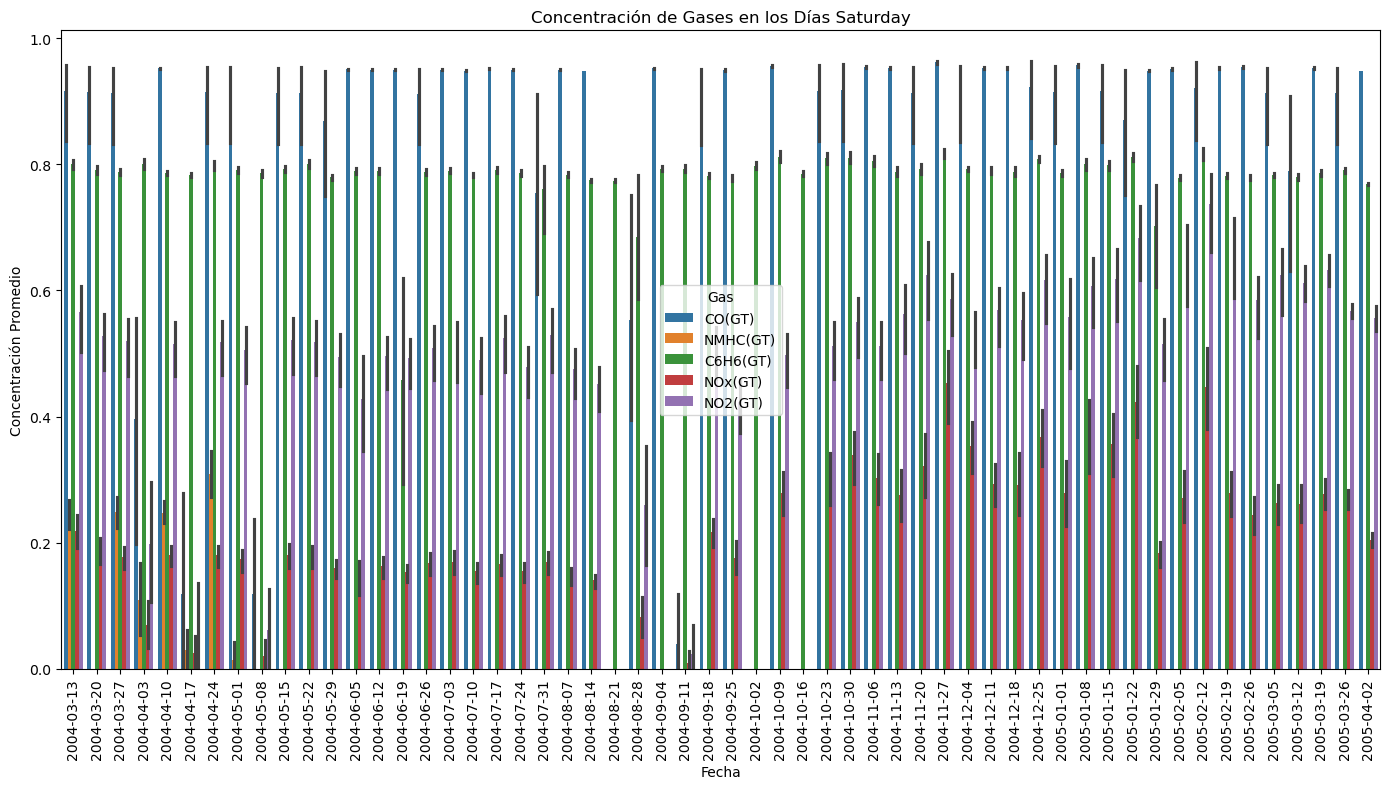

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_13748\1938287202.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')


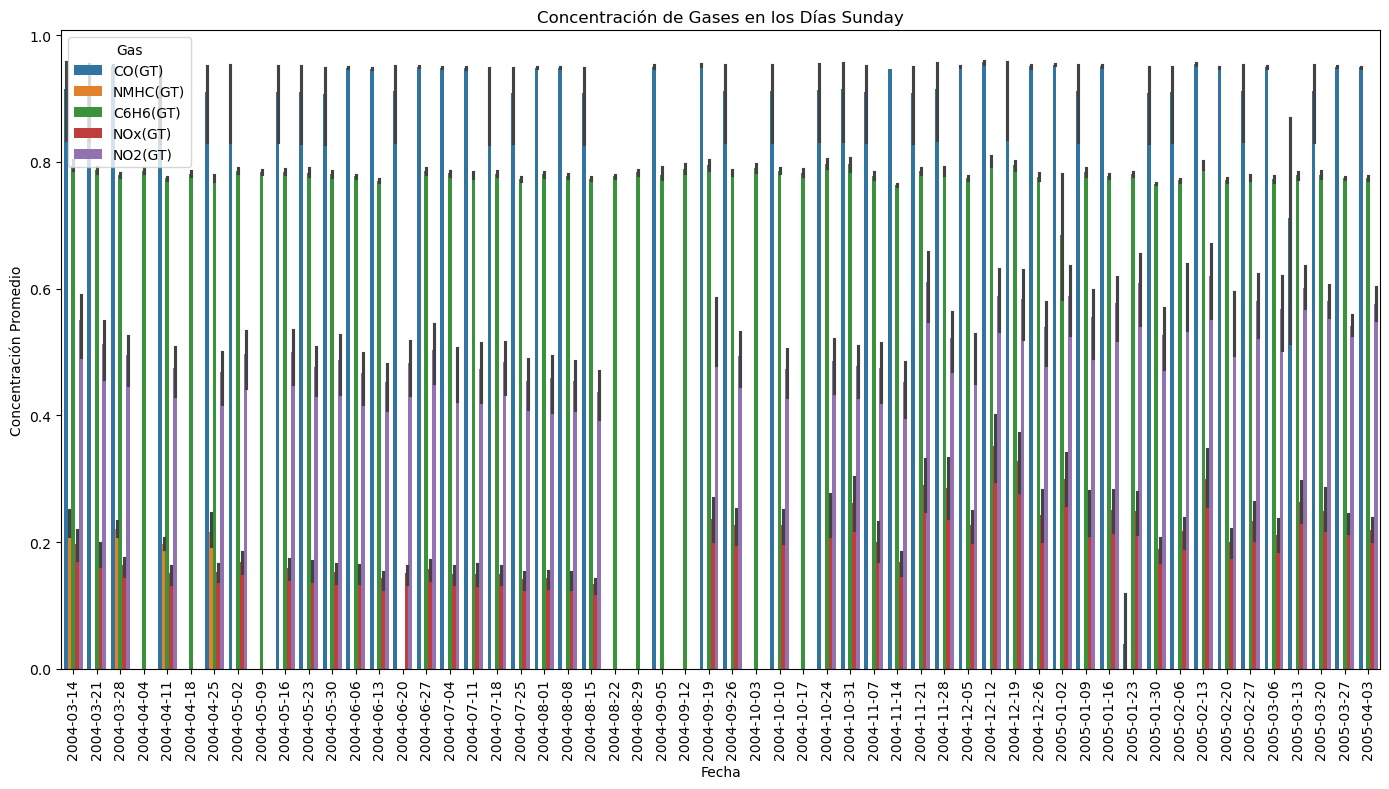

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gases a analizar
gases = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Suponiendo que el DataFrame 'df' ya contiene una columna 'Date' y una columna 'DiaSemana'
df['DiaSemana'] = df['Date'].dt.day_name()

# Mapeo de días de la semana a números
dias_semana_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# Generar gráficos para cada día de la semana
for dia_semana in dias_semana_map.keys():
    # Filtrar los datos para el día de la semana actual
    df_dia = df[df['DiaSemana'] == dia_semana]
    
    # Crear una nueva columna que combine la fecha para que sea más clara en el eje X
    df_dia['Fecha'] = df_dia['Date'].dt.strftime('%Y-%m-%d')
    
    # Establecer el gráfico
    plt.figure(figsize=(14, 8))

    # Graficar todos los gases para el día de la semana actual
    sns.barplot(
        data=df_dia.melt(id_vars=['Fecha'], value_vars=gases, var_name='Gas', value_name='Concentración'),
        x='Fecha', y='Concentración', hue='Gas', palette='tab10'
    )
    
    # Ajustar el gráfico
    plt.title(f'Concentración de Gases en los Días {dia_semana}')
    plt.xlabel('Fecha')
    plt.ylabel('Concentración Promedio')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor visibilidad
    plt.legend(title='Gas')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
